# <center> EDA and Sentiment Analysis of Fraudulent Job Postings

## <center> Project Proposal

## 1. Introduction and Background

### 1.1. Project Overview

The rise of digital platforms for job postings has transformed the employment landscape, 
providing new opportunities for job seekers and employers alike. However, this digital shift 
has also led to an increase in fraudulent job postings, which can have severe consequences for 
job seekers, including wasted time, identity theft, and financial scams. Identifying these 
fraudulent postings is critical to maintaining trust in online job boards and protecting vulnerable users.

This project focuses on analyzing fraudulent job postings using exploratory data analysis 
(EDA). Fraudulent job postings are a significant issue in recruitment, causing both financial 
and emotional harm to job seekers. By exploring the dataset and uncovering patterns, this study 
aims to prepare for future sentiment analysis to identify fake job postings more effectively. The 
study employs data science techniques, particularly Natural Language Processing (NLP) and 
machine learning, to analyze the sentiment embedded in job descriptions and classify them as 
genuine or fraudulent. Sentiment analysis, a subfield of NLP, can provide valuable insights into 
the tone, intent, and emotional content of job postings. By examining the language and 
sentiment used in fraudulent postings compared to legitimate ones, this study seeks to uncover 
patterns that can help differentiate between the two.

The dataset used for this project, sourced from Kaggle, contains 18,000 job postings, 800 of 
which are labeled as fraudulent. This dataset offers a rich resource for exploring not only textual 
sentiment but also metadata such as company profiles, location, and salary. By combining 
sentiment analysis with metadata-driven insights, the goal is to develop a robust classification
model capable of distinguishing fraudulent job postings from legitimate ones.

### 1.2. Relevance & Importance

The field of detecting fraudulent job postings is crucial for ensuring the safety and
trustworthiness of online employment platforms. Fraudulent postings can harm job seekers 
through scams, identity theft, and financial exploitation, making their detection vital for 
protecting users and maintaining confidence in job boards. This research area advances fraud 
detection by uncovering linguistic and sentiment patterns in fake postings, applying cutting-
edge NLP techniques like sentiment analysis to real-world problems. It also addresses ethical 
concerns around data use, privacy, and bias, ensuring that AI-driven solutions are fair and
responsible. By filling a gap in research on job posting fraud, this field not only empowers
platforms and job seekers but also fosters interdisciplinary innovation across data science,
linguistics, and cybersecurity. Ultimately, this work contributes to creating a safer, more
efficient, and equitable job market.

## 2. Objective & Research Questions

### 2.1. Objectives

The primary objectives of this research are to:

1.	Prepare the dataset for effective sentiment analysis and machine learning classification 
    models to distinguish between fraudulent and legitimate job postings.
  
2.	Analyze both textual features (job descriptions, company profiles, benefits, etc.) and
    metadata (e.g., job location, company logos) to identify distinctive patterns.

3.	Identify key linguistic and sentiment-based patterns in fraudulent job postings.

4.	Develop insights that can contribute to the development of fraud detection tools, 
    enhancing online job platform security and trustworthiness.

### 2.2. Research Questions

The key questions guiding this research are:

1. What text features and linguistic patterns are most prevalent in fraudulent versus 
    legitimate job postings?

2. How does sentiment polarity differ between fraudulent and legitimate postings
    and can sentiment trends serve as reliable predictors of fraud?

3. What insights can be drawn from the metadata (e.g., company profile, salary, 
    location) in identifying fraudulent postings?

## 3. Literature Review

### 3.1. Summary of Existing Work

Sentiment analysis has been a cornerstone in fraud detection, with extensive applications in 
areas such as:
1.	E-commerce: Identifying fake reviews by analyzing sentiment polarity and emotional tone.
2.	Social media: Spotting deceptive practices through sentiment and linguistic 
    inconsistencies in user-generated content.

Techniques like Natural Language Processing (NLP) and sentiment analysis have been 
successfully used in detecting deceptive practices, particularly by identifying anomalies in 
language, tone, and intent. Research studies by Hu and Liu (2004) explored opinion mining to 
uncover fraudulent patterns in e-commerce reviews. Similarly, Nasrin and Ghosh (2019) 
investigated fraud detection of Facebook business pages based on sentiment analysis. These
studies illustrate the versatility of sentiment analysis in detecting deception across domains but 
also highlight the lack of focus on job postings as a potential area of application.

There is a notable gap in research focused on the detection of fraudulent job postings through 
linguistic and sentiment analysis. While sentiment analysis is extensively applied in areas like 
social media and customer reviews, its application to job postings remains underexplored. This 
research seeks to apply NLP and sentiment analysis to uncover patterns that are specific to 
fraudulent job postings, contributing to the advancement of fraud detection techniques in the
recruitment industry. Fraudulent job postings are not only a growing concern but also present 
unique challenges due to their structured and professional tone. By leveraging sentiment 
analysis to detect subtle linguistic and emotional patterns, this research aims to enhance fraud
detection methodologies specifically tailored to the recruitment domain.

### 3.2. Dataset Selection and Justification

I considered two other datasets from Kaggle in addition to my chosen dataset:

1.	Fake News Detection Dataset: This dataset includes various textual data along with 
    fraud-related labels, making it well-suited for training supervised machine learning 
    models for fraud detection. The fraud labels provide the essential ground truth needed 
    to explore and analyze fraudulent job postings effectively.
2.	Online Job Postings Dataset: This dataset contains over 19,000 online job postings from 
    2004 to 2015, including various features such as job titles, descriptions, and other 
    relevant information.

My selected dataset is specifically tailored for analyzing fraudulent job postings, as it includes both the textual content of job descriptions and labels indicating fraudulence. The presence of these labels is essential for supervised learning tasks aimed at fraud detection. While the alternative datasets are valuable for general job market analysis and NLP tasks, they lack the necessary fraud indicators, making them less suitable for the specific research objectives of this 
study.

## 4. Methodology

### <center> Libraries Used

In [1]:
# Importing necessary libraries
import pandas as pd                # For data manipulation and analysis
import numpy as np                 # For numerical operations
import matplotlib.pyplot as plt    # For creating visualizations
import seaborn as sns              # For advanced visualizations
import nltk                        # For natural language processing
import re                          # For regular expressions (text cleaning)
import requests                    # For making HTTP requests
import time                        # For time-related operations
import unicodedata                 # For Unicode normalization
import contractions                # For expanding contractions in text (e.g., "can't" -> "cannot")
import wordninja                   # For splitting concatenated words
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # For sentiment analysis
from nltk.corpus import stopwords  # For removing common stop words in text
from nltk.tokenize import word_tokenize  # For breaking text into words (tokenization)
from nltk.stem import WordNetLemmatizer  # For lemmatization (reducing words to their root form)
from bs4 import BeautifulSoup      # For parsing HTML (useful for text extraction from webpages)
from PIL import Image              # For image processing
from re import sub                 # For pattern substitution in text
from textblob import Word          # For additional text analysis (e.g., spelling correction)

# NLTK Downloads - ensuring required NLTK resources are available
nltk.download('vader_lexicon')        # Download VADER Sentiment Lexicon for sentiment analysis
nltk.download('stopwords')            # Download stop words for text preprocessing
nltk.download('punkt')                # Download tokenizer data for splitting sentences/words
nltk.download('wordnet')              # Download WordNet database for lemmatization
nltk.download('averaged_perceptron_tagger')  # Download POS tagger for part-of-speech tagging
nltk.download('omw-1.4')              # Download multilingual WordNet data (e.g., for synonyms)

import os
import pandas as pd

# Get the current working directory and set a relative path
file_path = os.path.join("sampled_dataset.csv")

jobs = pd.read_csv(
    file_path,
    na_values=".",  # Treat "." as missing values
    na_filter=True  # Enable filtering of missing values
)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nicho\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nicho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nicho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nicho\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nicho\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-d

### 4.1. Dataset Overview

#### 4.1.1 Origin and Provenance of the Dataset

The dataset for this project was sourced from Kaggle, a trusted platform for open datasets. It
consists of job postings from the United States, with each posting labeled as either fraudulent or legitimate. The dataset contains approximately 18,000 job postings, with 800 labeled as fraudulent. Afterwards, I performed data modification to the dataset through random sampling and the dataset size was reduced to contain 3,575 job postings with 181 labeled as fraudulent.

### <center> Dataset

In [2]:
# Displaying the first few rows of the dataset
display(jobs)

job_id                                              title  \
0       4709                                    Python Engineer   
1      11080                                  Entry Level Sales   
2      12358                              Agile Project Manager   
3      14512                              Marketing Coordinator   
4      16692                            Full-stack Web Engineer   
...      ...                                                ...   
3571   10856          Customer Services Associate - Data Entry    
3572    9828  Back-end Developer - Financial/Retirement Mode...   
3573    4904                  Caregiver-Berrien County Michigan   
3574    6724                                 Real Estate Agents   
3575   16900              ***NEEDED 15-20 CUSTOMER SERVICE REPS   

                   location          department salary_range  \
0              GB, , London                 NaN          NaN   
1        US, OH, Cincinnati                 NaN  55000-75000   
2          US, NY, New York                 NaN          NaN   
3           GB, GBN, London  Business:Marketing          NaN   
4     US, CA, San Francisco                 NaN          NaN   
...                     ...                 ...          ...   
3571        US, CT, Windsor                 NaN          NaN   
3572        US, IL, Chicago                 NaN  65000-85000   
3573               US, MI,                  NaN          NaN   
3574        US, CA, Burbank                 NaN          NaN   
3575        US, NC, Raleigh                 NaN       55-105   

                                        company_profile  \
0                                                   NaN   
1                                                   NaN   
2     ustwo offers you the opportunity to be yoursel...   
3     We build software for fashion retailers, to he...   
4     Runscope is building tools for developers work...   
...                                                 ...   
3571  Novitex Enterprise Solutions, formerly Pitney ...   
3572  We believe in a smarter workplace.The gateway ...   
3573  "Our mission to our clients is to preserve the...   
3574                                                ...   
3575  LEI Home Enhancements, is an Ohio based compan...   

                                            description  \
0     Stylect is a dynamic startup that helps helps ...   
1     General Summary: Achieves maximum sales profit...   
2     At ustwo™ you get to be yourself, whilst deliv...   
3     About EDITDEDITD runs the world's biggest appa...   
4     As a Web Engineer at Runscope you'll be respon...   
...                                                 ...   
3571  We are currently seeking Customer Service Asso...   
3572  We’re looking for a back-end application devel...   
3573  Home Sweet Home In-Home Care is currently seek...   
3574  Dilbeck Real Estate is family-owned Real Estat...   
3575  Due to our expansion into 5 more cities we hav...   

                                           requirements  \
0     We don’t care where you studied or what your G...   
1                                                   NaN   
2     Skills• Experience interfacing directly with c...   
3     Required Skills / Experience:Ability to analys...   
4     Extensive front-end web experience (HTML/CSS/J...   
...                                                 ...   
3571  Required Qualifications:Previous data entry ex...   
3572  All of our developers here have experience in ...   
3573  Valid Driver’s LicenseValid Auto InsuranceReli...   
3574                                                NaN   
3575  Requirements: Must be a hard worker People ski...   

                                               benefits  telecommuting  \
0     We are negotiable on salary and there is the p...              0   
1     Great Health and DentalFast Advancement Opport...              1   
2                                                   NaN              0   
3        

#### 4.1.2. Key Features and Suitability for Research

The dataset includes 18 columns, which offer both textual data and metadata. Textual features
include ‘description’, ‘company_profile’, ‘requirements’, and ‘benefits’, which are critical for performing sentiment analysis and identifying linguistic patterns. Metadata features like
‘has_company_logo’, ‘required_experience’ and ‘industry’ etc. provide additional insights that
can help distinguish fraudulent postings from legitimate ones.

#### 4.1.3. Data Modifications

To ensure computational efficiency and maintain a manageable file size, random sampling was
used to reduce the dataset from 48MB to 10MB. This modification ensures the dataset remains
diverse while making it easier to process. Additionally, preprocessing steps like text
normalization and format conversions were applied to prepare the data for analysis.

The project follows a systematic analytical pipeline designed to extract meaningful insights and classify job postings as fraudulent or legitimate.

### 4.2. Analytical Pipeline

The analytical process began with data cleaning and preprocessing, addressing missing values,
removing irrelevant characters, and normalizing text data to ensure readiness for analysis. Next, exploratory data analysis (EDA) was conducted using visualizations such as bar plots,
histograms, pie charts, box plots, heatmaps, and word clouds to uncover trends in features like job categories, locations, and text lengths, comparing fraudulent and legitimate postings.Natural Language Processing (NLP) techniques like tokenization, lemmatization, and stopword removal prepared textual data for feature extraction, revealing critical words and patterns. Additionally, sentiment analysis was conducted to evaluate the emotional tone of job postings by calculating sentiment polarity, revealing whether fraudulent postings exhibit more neutral or overly positive tones compared to legitimate ones.

The analysis utilized Python libraries such as Pandas, NumPy, Matplotlib, Seaborn, Wordcloud,
NLTK, and TextBlob for comprehensive data exploration, text processing, and sentiment analysis.


Subsequently, key patterns and linguistic features that differentiate fraudulent from legitimate job postings will be extracted. These insights will aid in developing and refining classification models, enabling automated detection of fraudulent job postings in the future.

## 5. Limitations & Constraints

### 5.1 Dataset Limitations

The dataset contains some missing values, particularly in metadata fields such as company
profiles and logos, which may limit the comprehensiveness of metadata-driven analysis.
Additionally, the dataset's relatively small number of fraudulent postings compared to
legitimate ones introduces potential class imbalance issues, which could affect the accuracy
and robustness of machine learning models. Furthermore, the dataset is limited to the U.S.-
based job postings, which restricts the generalizability of findings to other regions or global contexts.

### 5.2. Technical Constraints

To accommodate computational resource limitations, the dataset size was reduced from 48MB
to 10MB through random sampling. While this approach preserved the integrity of the
remaining data, it may have inadvertently excluded potentially valuable patterns or rare
fraudulent cases. This constraint highlights the trade-off between computational efficiency and the risk of losing critical information that could influence insights and model performance.

### 5.3. External Constraints

Legal and ethical considerations limited the scope of the analysis to the dataset as provided,
avoiding augmentation with external data sources to ensure compliance with privacy and licensing requirements.

## 6. Ethical Considerations

### 6.1 Data Provenance and Licensing

The dataset was ethically sourced from Kaggle, ensuring compliance with open data usage
rights and appropriate licensing. Proper attribution was given to the original contributors in
accordance with Kaggle's guidelines, distinguishing between the original work and insights
derived from the dataset.

### 6.2. Privacy and Anonymity

Although the dataset did not contain personal information, measures were taken to ensure that
no identifying details could be inferred from the data. These precautions align with ethical
standards for data handling and maintain user anonymity throughout the analysis.

### 6.3. Usage of Data for Future Analysis

The dataset will be reused ethically for sentiment analysis and machine learning applications,
with strict adherence to data privacy and licensing requirements. Any future use will prioritize
responsible and fair applications, ensuring that insights derived from the data do not perpetuate
biases or violate ethical standards.

## 7. Basic Dataset Exploration 

The dataset was first examined using descriptive statistics to understand its structure and identify key trends. Fraudulent job postings were found to make up a smaller fraction of the dataset, reflecting class imbalance. Important features such as job descriptions, telecommuting options, company profiles, and job locations were analyzed to uncover relevant patterns. This analysis laid the groundwork for selecting features critical for distinguishing fraudulent from legitimate postings.

Several Python libraries were utilized to perform this analysis effectively. Pandas facilitated data manipulation and exploratory analysis, while NumPy handled numerical computations. Matplotlib and Seaborn were employed to create insightful visualizations, and Word Cloud generated visual representations of text data. Sentiment analysis was conducted using libraries such as VADER and TextBlob, while WordNinja was used to split concatenated words for better text preprocessing and analysis.
As for visualisation techniques, the following chart types were used:

1.	Bar Charts and Histograms: These were used to analyze categorical features like employment type, industry, and job locations. For instance, a histogram revealed the distribution of job postings by country, while bar charts highlighted the industries most associated with fraudulent postings.

2.	Box Plots: Box plots illustrated differences in word count across textual fields, such as job descriptions, company profiles, and benefits, showing that fraudulent postings are generally shorter.

3.	Word Clouds: Word clouds provided a quick visual representation of frequently used terms in textual features, revealing differences between fraudulent and legitimate postings.

4.	Heatmaps: Heatmaps were used to visualize missing values in the dataset and to identify correlations between variables.

5.	Pie Charts: Pie charts were used to depict the proportion of fraudulent to legitimate job postings, providing a straightforward overview of the dataset's composition.


### <center> Descriptive Statistics

In [3]:
# Display dataset structure, data types, and missing values
print("Overview of Data Types and Null Counts:")
print(jobs.info())
print("\n" + "-" * 50 + "\n")  # Separator for output readability

# Display summary statistics for numeric columns
print("Summary Statistics for Numerical Variables:")
print(jobs.describe())

Overview of Data Types and Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               3576 non-null   int64 
 1   title                3576 non-null   object
 2   location             3506 non-null   object
 3   department           1252 non-null   object
 4   salary_range         588 non-null    object
 5   company_profile      2884 non-null   object
 6   description          3576 non-null   object
 7   requirements         3025 non-null   object
 8   benefits             2129 non-null   object
 9   telecommuting        3576 non-null   int64 
 10  has_company_logo     3576 non-null   int64 
 11  has_questions        3576 non-null   int64 
 12  employment_type      2874 non-null   object
 13  required_experience  2116 non-null   object
 14  required_education   1944 non-null   object
 15  industry       

In [4]:
print(jobs.columns) # Diff columns in the data 

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')


### <center> Bar Plot for Distribution of Real vs Fraudulent Jobs

I generated a bar plot to visualize the distribution of real versus fraudulent jobs, highlighting class imbalance using Seaborn's countplot. The bars are annotated with their counts, and the plot is displayed using plt.show(). The annotations are positioned dynamically for clarity.
The bar plot created shows the distribution of real versus fraudulent job listings, highlighting a significant class imbalance. The x-axis represents the fraudulent variable (0 for real jobs, 1 for fraudulent), and the y-axis shows the count of listings. The bars indicate that the dataset contains a significantly larger number of real jobs (3,395) compared to fraudulent ones (181). This imbalance is critical to note for further analysis and modeling, as it may affect the performance of predictive models, potentially leading to bias toward the majority class. Addressing this imbalance using techniques like oversampling, undersampling, or weighted metrics will be essential for building a robust model.


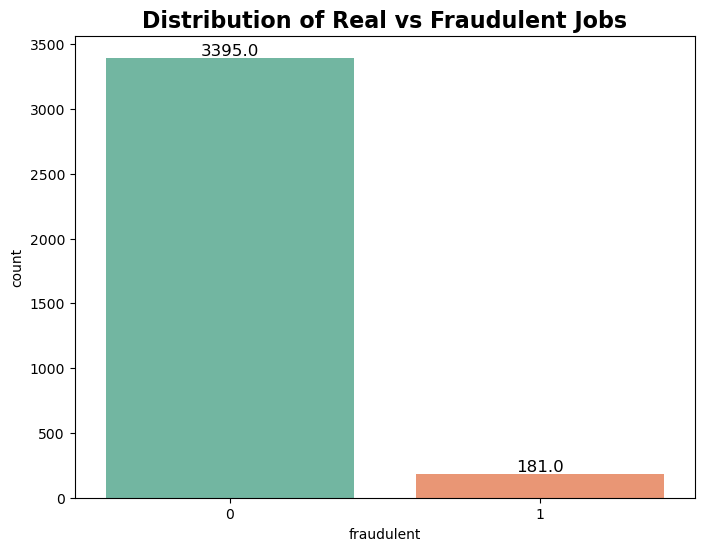

In [5]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Count plot for fraudulent vs real jobs, with color-coding based on the 'fraudulent' column
sns.countplot(x='fraudulent', data=jobs, palette='Set2', hue='fraudulent', legend=False)

# Add title to the plot
plt.title('Distribution of Real vs Fraudulent Jobs', fontsize=16, fontweight='bold')

# Annotate each bar with its count
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', 
                       xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

### <center> Pie Chart for Proportion of Real vs Fraudulent Jobs

This code generates a pie chart to visualize the proportion of real versus fraudulent jobs. It calculates the relative frequencies of each class using value_counts with normalize=True, then formats the values as percentages. The pie chart is created with plot.pie, displaying percentages on the chart, custom colors, and labels. The chart is rotated for readability, with a title added and the y-axis label removed. Finally, plt.show() displays the chart.
This pie chart visualizes the proportion of real versus fraudulent job listings, showing that 94.9% are real (blue) and 5.1% are fraudulent (red). It highlights the class imbalance, where fraudulent jobs are the minority. This imbalance is important for predictive modeling and may require strategies like resampling, cost-sensitive learning, or using metrics that consider the minority class. The chart effectively communicates this disparity in the dataset.


Proportion of Fraudulent vs. Real Jobs:
fraudulent
0    94.94%
1     5.06%
Name: proportion, dtype: object


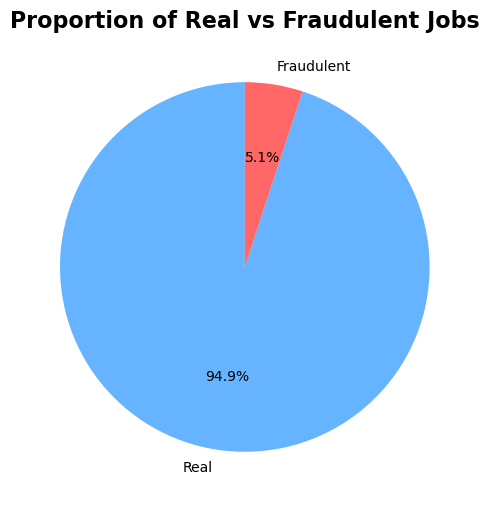

In [6]:
# Calculate the proportion of fraudulent vs. real jobs
proportion = jobs['fraudulent'].value_counts(normalize=True).sort_index()

# Display the proportions as percentages
print("Proportion of Fraudulent vs. Real Jobs:")
print(proportion.apply(lambda x: f"{x*100:.2f}%"))

# Visualize the proportions with a pie chart
plt.figure(figsize=(6, 6))
proportion.plot.pie(
    autopct='%1.1f%%', 
    colors=['#66b3ff', '#ff6666'], 
    startangle=90, 
    labels=['Real', 'Fraudulent']
)
plt.title('Proportion of Real vs Fraudulent Jobs', fontsize=16, fontweight='bold')
plt.ylabel('')  # Remove the default y-axis label
plt.show()

### <center> Interactive Heatmap for Correlation Matrix of Numeric Variables

I created an interactive heatmap using Plotly Express to visualize correlations between numerical variables. It first selects numerical columns (float64 and int64), computes the correlation matrix, and reshapes it for easier plotting. The heatmap is then generated using px.imshow, with color intensity representing the correlation values, providing an intuitive way to explore variable relationships in the dataset.

The heatmap reveals minimal correlation between most of the features in the dataset. This suggests that the variables are largely independent and might each provide distinct insights into the problem at hand. For example, ‘telecommuting’ has a low correlation with other features, which could indicate that it has unique predictive power for fraud detection, separate from other features like ‘has_questions’ or ‘has_company_logo’. Despite the lack of strong correlations, these features might still be important for distinguishing fraudulent job postings, especially when considered in combination or through more advanced modeling techniques. Additionally, the low correlation between variables suggests minimal concern for multicollinearity, which simplifies model interpretation. This insight drives the need to consider each feature on its own and potentially explore non-linear relationships or interactions between features that a simple correlation matrix does not capture.


In [7]:
import plotly.express as px

numerical_columns = jobs.select_dtypes(include=['float64', 'int64']).columns

#Compute the correlation matrix
corr_matrix = jobs[numerical_columns].corr()

#Convert to long format
corr_matrix_long = corr_matrix.reset_index().melt(id_vars='index')

#Plot interactive heatmap
fig = px.imshow(corr_matrix, labels=dict(x="Variables", y="Variables", color="Correlation"), title="Interactive Heatmap")
fig.show()

## 8. Data Cleaning and Processing

### 8.1. Filtering Missing Values and Irrelevant Columns

To begin, I utilized a heatmap to visualize the distribution of missing values across the dataset. This analysis highlighted that the variables ‘department’ and ‘salary_range’ had the highest proportions of missing values.

### <center> Heatmap Visualisation for Missing Values 

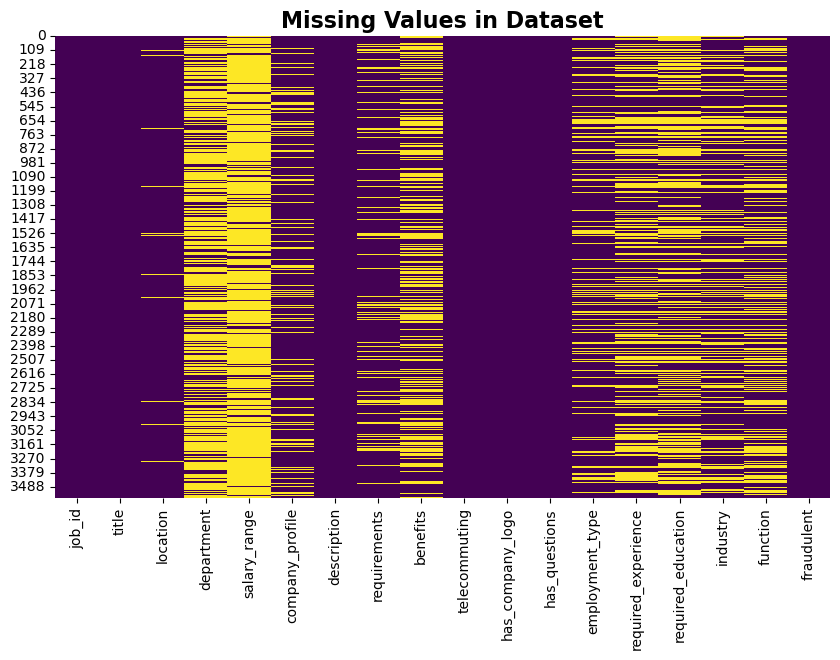

In [8]:
# Visualizing missing values with a heatmap
plt.figure(figsize=(10, 6))  # Adjusting the figure size for better readability

# Create a heatmap with 'viridis' color palette
sns.heatmap(jobs.isnull(), cbar=False, cmap='viridis')

# Add a bold title
plt.title("Missing Values in Dataset", fontsize=16, fontweight='bold')

# Show the plot
plt.show()

In [9]:
#checking for missing values
print(jobs.isnull().sum()) 

job_id                    0
title                     0
location                 70
department             2324
salary_range           2988
company_profile         692
description               0
requirements            551
benefits               1447
telecommuting             0
has_company_logo          0
has_questions             0
employment_type         702
required_experience    1460
required_education     1632
industry               1009
function               1332
fraudulent                0
dtype: int64


Upon calculating the exact percentages, I observed that ‘department’ had 64.99% missing values, while ‘salary_range’ had 83.56%. For other categorical variables with missing values below 50%, these were imputed with empty strings to minimize data loss.

In [10]:
# Checking the percentage of missing values in each column
missing_percentage = jobs.isnull().mean() * 100

print(missing_percentage)

job_id                  0.000000
title                   0.000000
location                1.957494
department             64.988814
salary_range           83.557047
company_profile        19.351230
description             0.000000
requirements           15.408277
benefits               40.464206
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.630872
required_experience    40.827740
required_education     45.637584
industry               28.215884
function               37.248322
fraudulent              0.000000
dtype: float64


Next, I addressed the variables with excessive missing data. The columns ‘department’ and ‘salary_range’ were dropped due to their high proportion of missing values, which could compromise the accuracy of the sentiment analysis. Dropping these columns ensured the dataset’s integrity while preserving analytical reliability.

Additionally, I excluded irrelevant columns such as ‘job_id’ and ‘location.’ The ‘job_id’ column serves only as an identifier and does not contribute to the analysis, while the ‘location’ column was deemed unnecessary as all data points were within the US. This refinement step aimed to balance data volume with quality, focusing on variables relevant to sentiment analysis.

In [11]:
# Identifying textual columns in the dataset
text_data = jobs.select_dtypes(include="object").copy()

# Dropping columns with more than 50% missing values
text_data.drop(["department", "salary_range"], axis=1, inplace=True)

# Storing the remaining text columns
text_col = text_data.columns

In [12]:
text_col

Index(['title', 'location', 'company_profile', 'description', 'requirements',
       'benefits', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function'],
      dtype='object')

In [13]:
# Replacing NaN values with empty strings in text columns
jobs[text_col] = jobs[text_col].replace(np.nan, "")

In [14]:
print(jobs.isnull().sum())

job_id                    0
title                     0
location                  0
department             2324
salary_range           2988
company_profile           0
description               0
requirements              0
benefits                  0
telecommuting             0
has_company_logo          0
has_questions             0
employment_type           0
required_experience       0
required_education        0
industry                  0
function                  0
fraudulent                0
dtype: int64


In [15]:
# Dropping irrelevant columns that do not contribute to the analysis
jobs.drop(columns=['job_id', 'department', 'salary_range'], inplace=True)

In [16]:
# Verifying that missing values have been handled
print(jobs.isnull().sum())

title                  0
location               0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64


### 8.2. Text Preprocessing for Sentiment Analysis and Fraud Detection

The textual columns selected for sentiment analysis include ‘company_profile,’ ‘description,’ ‘requirements,’ and ‘benefits.’ These columns contain significant noise, such as punctuation, inconsistent casing, misspellings, and special characters, which would hinder accurate sentiment analysis if left unaddressed.
To resolve this, I performed extensive preprocessing using various Python libraries to clean and standardize the textual data.


In [17]:
# Displaying the first few rows of the cleaned dataset with textual data columns
jobs[['company_profile', 'description', 'requirements', 'benefits']].head()

company_profile  \
0                                                      
1                                                      
2  ustwo offers you the opportunity to be yoursel...   
3  We build software for fashion retailers, to he...   
4  Runscope is building tools for developers work...   

                                         description  \
0  Stylect is a dynamic startup that helps helps ...   
1  General Summary: Achieves maximum sales profit...   
2  At ustwo™ you get to be yourself, whilst deliv...   
3  About EDITDEDITD runs the world's biggest appa...   
4  As a Web Engineer at Runscope you'll be respon...   

                                        requirements  \
0  We don’t care where you studied or what your G...   
1                                                      
2  Skills• Experience interfacing directly with c...   
3  Required Skills / Experience:Ability to analys...   
4  Extensive front-end web experience (HTML/CSS/J...   

                                            benefits  
0  We are negotiable on salary and there is the p...  
1  Great Health and DentalFast Advancement Opport...  
2                                                     
3                                                     
4  Be a part of an experienced team who have work...

For textual data cleaning, I utilized the following Python libraries:

1.	NLTK (Natural Language Toolkit): For tasks like stopword removal and tokenization.

2.	re (Regular Expressions): To identify and remove patterns like URLs, email addresses, and special characters.

3.	Wordninja: To split concatenated words effectively.

Additionally, I employed the VADER (Valence Aware Dictionary for Sentiment Reasoning) lexicon to identify sentiment-specific words and exclude them from the stopwords dictionary.
This ensured that meaningful terms contributing to sentiment analysis were retained.


In [18]:
# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define stopwords, excluding VADER sentiment words
stop_words = set(stopwords.words('english'))  # Standard English stopwords
sentiment_words = set(sia.lexicon.keys())  # Words in the VADER lexicon
stop_words -= sentiment_words  # Remove sentiment words from the stopwords set

# Initialize lemmatizer for text preprocessing
lemmatizer = WordNetLemmatizer()

#### 8.2.1 Lowercasing and Removal of Noise

The first step in the cleaning process involved removing noise and inconsistencies from the textual data. Special characters, punctuation marks, URLs, and email addresses were eliminated to reduce clutter. CamelCase formatting, often present in the data, was converted into separate words to improve readability and processing. To maintain uniformity, all text was transformed to lowercase. Expanding contractions, such as converting “don’t” to “do not,” further enhanced the dataset's consistency, minimizing redundancy and ambiguity.

In [19]:
# Function to expand contractions in text (e.g., "I've" -> "I have")
def expand_contractions(text):
    if isinstance(text, str):
        return contractions.fix(text)  # Expand contractions using the `contractions` library
    return text  # Return the original value if not a string

In [20]:
# Function to clean and preprocess text
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert text to lowercase
        text = expand_contractions(text)  # Expand contractions (e.g., "don't" -> "do not")

        # Remove URLs, email addresses, and mentions
        text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
        text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
        text = re.sub(r'@\w+', '', text)  # Remove mentions (e.g., @username)

        # Handle camel case and missing spaces
        text = re.sub(r'([a-zA-Z])([A-Z])', r'\1 \2', text)  # Split camel case
        text = re.sub(r'(\d)([a-zA-Z])', r'\1 \2', text)  # Space between numbers and letters
        text = re.sub(r'([a-zA-Z])(\d)', r'\1 \2', text)  # Space between letters and numbers

        # Remove unwanted characters and extra spaces
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only letters and spaces
        text = re.sub(r'\b[a-zA-Z]\b', '', text)  # Remove single letters
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces and trim

        # Normalize unicode characters (e.g., accented characters to ASCII)
        text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('ASCII')

        return text  # Return the cleaned text
    return text  # Return unchanged if not a string

#### 8.2.3 Stopwords Removal

After removing noise, I focused on reducing dimensionality by eliminating common stopwords. Words like “the,” “and,” and “is” were removed using a predefined stopwords list from NLTK, as they do not contribute significantly to the analysis. However, sentiment-specific words that might play a role in distinguishing fraudulent postings from legitimate ones were retained by customizing the stopwords list.

In [21]:
# Function to remove stopwords from text
def remove_stopwords(text):
    if isinstance(text, str):
        # Keep only words that are not in the stop_words set
        return ' '.join([word for word in text.split() if word not in stop_words])
    else:
        return ""  # Return an empty string if input is not valid text

In [22]:
print(f"Final stopwords list (excluding VADER words): {stop_words}")

Final stopwords list (excluding VADER words): {'were', 'where', 'few', 'very', 'ain', 'i', "shouldn't", 'doesn', 'as', 'how', 'her', 'my', 'same', 'him', "you'll", "it's", 'had', 'into', 'now', "wasn't", 'me', "she's", 'during', "doesn't", 'did', 'off', 'hasn', "wouldn't", 'from', 's', 'he', 'wasn', 'that', 'you', 'mustn', "you'd", "you're", 'am', 'out', 'm', 'which', 'all', 'aren', 'their', 'after', 'ourselves', 'themselves', 'below', 'only', 'a', 'this', 'myself', 'being', "don't", 'there', 'because', 'then', 'what', 'd', 'mightn', 'can', 'when', 'those', 'shan', 'or', 'his', 'couldn', 'and', "should've", 'having', 'yourself', 'yourselves', 'under', "aren't", 'at', 'has', 'but', 'until', 'shouldn', 'itself', 'll', 'ours', 'than', 'for', 'if', "mightn't", 't', 'once', 'we', 'both', 'not', 'don', 'are', 'hers', 'each', 'wouldn', 'against', 'other', 'should', 'above', 'your', 'do', 're', 'more', 'our', 'theirs', "isn't", "weren't", "won't", 'an', 'who', 'any', 'isn', "shan't", 'was', 'w

#### 8.2.4. Lemmatization & Tokenization

Next, I employed lemmatization and tokenization to prepare the data for NLP tasks. I lemmatized the words to their root forms, such as transforming “running” to “run.” This step reduced redundancy and ensured variations of the same word were treated uniformly. Following this, tokenization divided the text into individual words or meaningful segments, allowing for more granular analysis.


In [23]:
# Function to lemmatize and tokenize text
def lemmatize_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)  # Tokenize the text into words
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha()]  # Lemmatize and keep only alphabetic tokens
        return ' '.join(tokens)  # Return the lemmatized tokens as a single string
    return text  # Return the original input if it's not a string

### <center> Textual Cleaning Process

In [24]:
# Apply the cleaning process to texual columns
columns_to_clean = ['company_profile', 'benefits', 'requirements', 'description']

In [25]:
# Apply the text cleaning function to texual columns
for column in columns_to_clean:
    if column in jobs.columns:
        jobs[column] = jobs[column].apply(clean_text)  # Clean text in each column

# Verify the cleaning process by displaying the first few rows of texual columns
jobs[['company_profile', 'benefits', 'requirements', 'description']].head()

company_profile  \
0                                                      
1                                                      
2  ustwo offers you the opportunity to be yoursel...   
3  we build software for fashion retailers to hel...   
4  runscope is building tools for developers work...   

                                            benefits  \
0  we are negotiable on salary and there is the p...   
1  great health and dentalfast advancement opport...   
2                                                      
3                                                      
4  be part of an experienced team who have worked...   

                                        requirements  \
0  we do not care where you studied or what your ...   
1                                                      
2  skills experience interfacing directly with cl...   
3  required skills experienceability to analyse d...   
4  extensive frontend web experience htmlcssjavas...   

                                         description  
0  stylect is dynamic startup that helps helps wo...  
1  general summary achieves maximum sales profita...  
2  at ustwo you get to be yourself whilst deliver...  
3  about editdeditd runs the worlds biggest appar...  
4  as web engineer at runscope you will be respon...

In [26]:
# Apply the function to expand contractions in textual columns
for column in columns_to_clean:
    if column in jobs.columns:
        jobs[column] = jobs[column].apply(expand_contractions)

# Verify the process by displaying the first few rows of texual columns
jobs[['company_profile', 'benefits', 'requirements', 'description']].head()

company_profile  \
0                                                      
1                                                      
2  ustwo offers you the opportunity to be yoursel...   
3  we build software for fashion retailers to hel...   
4  runscope is building tools for developers work...   

                                            benefits  \
0  we are negotiable on salary and there is the p...   
1  great health and dentalfast advancement opport...   
2                                                      
3                                                      
4  be part of an experienced team who have worked...   

                                        requirements  \
0  we do not care where you studied or what your ...   
1                                                      
2  skills experience interfacing directly with cl...   
3  required skills experienceability to analyse d...   
4  extensive frontend web experience htmlcssjavas...   

                                         description  
0  stylect is dynamic startup that helps helps wo...  
1  general summary achieves maximum sales profita...  
2  at ustwo you get to be yourself whilst deliver...  
3  about editdeditd runs the worlds biggest appar...  
4  as web engineer at runscope you will be respon...

In [27]:
# Apply the function to remove stopwords from textual columns
for column in columns_to_clean:
    if column in jobs.columns:
        jobs[column] = jobs[column].apply(remove_stopwords)

# Verify the process by displaying the first few rows of texual columns
jobs[['company_profile', 'benefits', 'requirements', 'description']].head()

company_profile  \
0                                                      
1                                                      
2  ustwo offers opportunity whilst delivering bes...   
3  build software fashion retailers help make rig...   
4  runscope building tools developers working api...   

                                            benefits  \
0  negotiable salary potential equity right candi...   
1  great health dentalfast advancement opportunit...   
2                                                      
3                                                      
4  part experienced team worked popular web sites...   

                                        requirements  \
0  care studied gpa college want someone isstrong...   
1                                                      
2  skills experience interfacing directly clients...   
3  required skills experienceability analyse data...   
4  extensive frontend web experience htmlcssjavas...   

                                         description  
0  stylect dynamic startup helps helps women disc...  
1  general summary achieves maximum sales profita...  
2  ustwo get whilst delivering best work planet b...  
3  editdeditd runs worlds biggest apparel data wa...  
4  web engineer runscope responsible building wor...

In [28]:
# Apply the function to lemmatize text in texual columns
for column in columns_to_clean:
    if column in jobs.columns:
        jobs[column] = jobs[column].apply(lemmatize_text)

# Verify the process by displaying the first few rows of textual columns
jobs[['company_profile', 'benefits', 'requirements', 'description']].head()

company_profile  \
0                                                      
1                                                      
2  ustwo offer opportunity whilst delivering best...   
3  build software fashion retailer help make righ...   
4  runscope building tool developer working apidr...   

                                            benefits  \
0  negotiable salary potential equity right candi...   
1  great health dentalfast advancement opportunit...   
2                                                      
3                                                      
4  part experienced team worked popular web site ...   

                                        requirements  \
0  care studied gpa college want someone isstrong...   
1                                                      
2  skill experience interfacing directly client e...   
3  required skill experienceability analyse datab...   
4  extensive frontend web experience htmlcssjavas...   

                                         description  
0  stylect dynamic startup help help woman discov...  
1  general summary achieves maximum sale profitab...  
2  ustwo get whilst delivering best work planet b...  
3  editdeditd run world biggest apparel data ware...  
4  web engineer runscope responsible building wor...

During the cleaning process, I identified instances of concatenated words, such as “ustwo” instead of “us” and “two.” These anomalies could distort the analysis if not addressed. 

#### 8.2.5. Splitting Concatenated Words

To resolve this, I used the Wordninja library to accurately split such terms based on a comprehensive dictionary. For example, “ustwo” was successfully separated into “us” and “two,” ensuring the integrity of the textual data.

In [29]:
# Function to split concatenated words (e.g., "jobposting" -> "job posting")
def split_with_wordninja(text):
    if isinstance(text, str):
        return " ".join(wordninja.split(text))  # Split concatenated words using WordNinja
    return text  # Return unchanged if input is not a string

### <center> Final Cleaned Textual Data

With these preprocessing steps complete, the textual data was transformed into a clean, consistent, and well-structured format, ready for further analysis and exploration. These measures ensure that the dataset is optimized for sentiment analysis and other NLP tasks, minimizing noise and maximizing the quality of the insights obtained.

In [30]:
# Apply the split function to split concatenated words in the selected columns
jobs[columns_to_clean] = jobs[columns_to_clean].apply(lambda col: col.map(split_with_wordninja))

# Verify the process by displaying the first few rows of key columns
jobs[['company_profile', 'benefits', 'requirements', 'description']].head()

company_profile  \
0                                                      
1                                                      
2  us two offer opportunity whilst delivering bes...   
3  build software fashion retailer help make righ...   
4  run scope building tool developer working api ...   

                                            benefits  \
0  negotiable salary potential equity right candi...   
1  great health dental fast advancement opportuni...   
2                                                      
3                                                      
4  part experienced team worked popular web site ...   

                                        requirements  \
0  care studied gpa college want someone is stron...   
1                                                      
2  skill experience interfacing directly client e...   
3  required skill experience ability analyse data...   
4  extensive frontend web experience html css jav...   

                                         description  
0  style ct dynamic startup help help woman disco...  
1  general summary achieves maximum sale profitab...  
2  us two get whilst delivering best work planet ...  
3  edit d edit d run world biggest apparel data w...  
4  web engineer run scope responsible building wo...

## 9. Exploratory Data Analysis and Interpretation of Findings

### 9.1. Textual Data Exploration

Textual data was a significant focus, as job descriptions, requirements, and company profiles were analyzed to uncover patterns in language use. Word Clouds and Word Frequency Analysis highlighted recurring terms and phrases, with fraudulent postings frequently using vague language.
Sentiment polarity was measured using TextBlob to identify trends in emotional tone, particularly the neutral sentiment often found in fraudulent postings.


### <center> Text Length Comparison in Real vs Fraudulent Jobs

To analyze the length of textual data, I applied the len function to each row in the relevant text columns (job description, company profile, benefits, and requirements) to calculate the word count for each entry. By using the apply() method in Python, I efficiently calculated the length of the text in each column across all rows. This approach allowed for an accurate comparison of word counts between fraudulent and legitimate job postings. The results were then visualized using a box plot to highlight differences in word counts.

A comparison of the word counts from the box plots for the textual fields (‘description’, ‘company_profile’, ‘benefits’, and ‘requirements’) revealed distinct patterns between fraudulent and real job postings. Fraudulent job postings tend to have fewer words in the company profile, benefits, and requirements sections compared to real ones. This observation suggests that fraudulent postings often provide less detailed information, possibly because they lack the legitimate, substantive details that can be elaborated upon. Fraudsters may intentionally keep their content brief to avoid revealing inconsistencies or missing details that could raise suspicion. The box plot analysis confirmed this trend, showing that fraudulent postings were clustered around the lower end of the word count range, indicating their brevity and lack of depth.

In contrast, legitimate job postings exhibited a broader range of word counts, with more entries spread across higher word counts. These postings typically contain more comprehensive and detailed information about the job role, company culture, benefits, and expectations. The wider distribution of word counts for real job postings suggests that they often include richer content to provide a clear and transparent picture of the opportunity. The presence of longer, more descriptive sections—especially in the company profile and requirements—reflects a higher level of detail and authenticity, which is typical of genuine job listings. The box plot for real postings showed more variation in word counts, indicating that companies often take the time to thoroughly describe the job, its requirements, and the benefits, contributing to the credibility and transparency of the posting.
Overall, the word count analysis, supported by the box plot, reinforces the idea that fraudulent postings tend to be concise and lack the substantive content typical of real job listings.


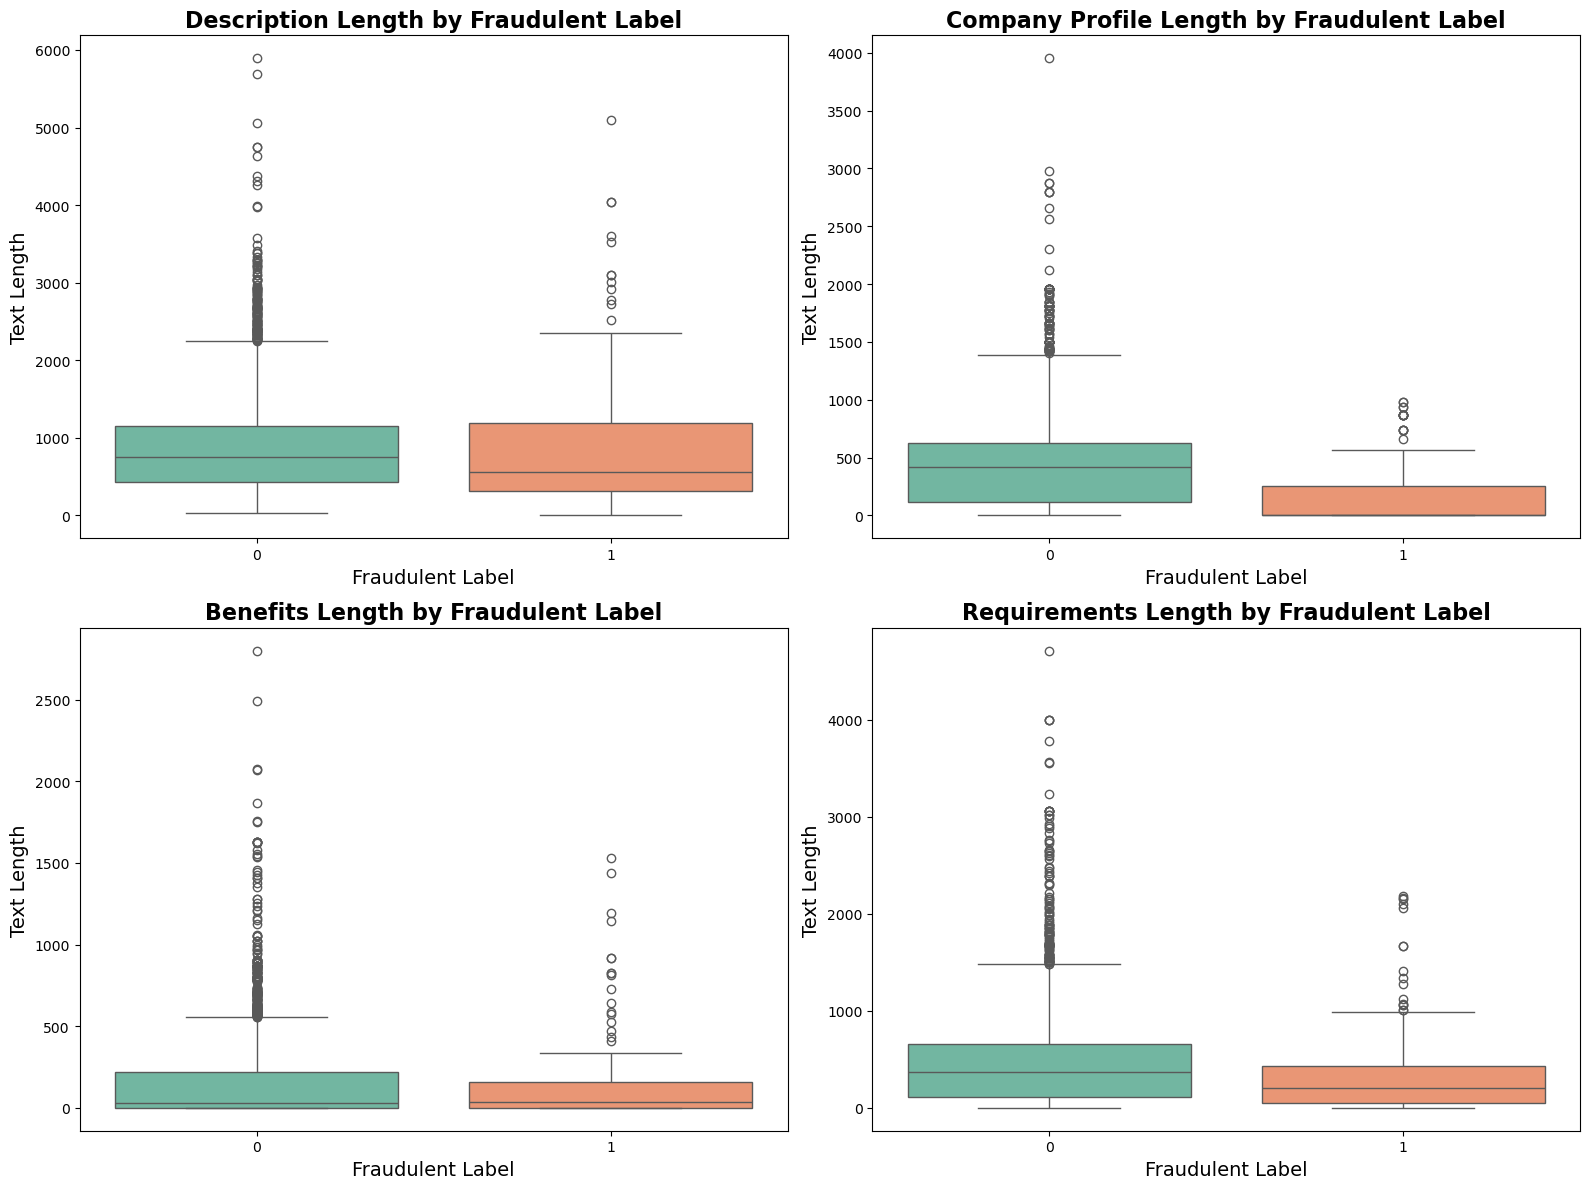

In [31]:
# Creating new columns for text lengths
jobs['description_length'] = jobs['description'].fillna('').apply(len)
jobs['company_profile_length'] = jobs['company_profile'].fillna('').apply(len)
jobs['benefits_length'] = jobs['benefits'].fillna('').apply(len)
jobs['requirements_length'] = jobs['requirements'].fillna('').apply(len)

# Visualize text length distributions for each column
text_features = ['description_length', 'company_profile_length', 'benefits_length', 'requirements_length']
titles = ['Description', 'Company Profile', 'Benefits', 'Requirements']

plt.figure(figsize=(16, 12))

# Loop through the features and create boxplots
for i, feature in enumerate(text_features):
    plt.subplot(2, 2, i + 1)  # 2 rows, 2 columns
    sns.boxplot(x='fraudulent', y=feature, data=jobs, hue='fraudulent', palette='Set2', legend=False)  # Assign 'fraudulent' to hue
    plt.title(f'{titles[i]} Length by Fraudulent Label', fontsize=16, fontweight='bold')  # Bold title
    plt.xlabel('Fraudulent Label', fontsize=14)
    plt.ylabel('Text Length', fontsize=14)

#Display boxplot
plt.tight_layout()
plt.show()

### <center> Sentiment Polarity for Textual Data in Real vs Fraudulent Jobs

To analyze sentiment polarity, I used the TextBlob library, which provides a simple API for performing common NLP tasks, including sentiment analysis. For each job posting, the TextBlob function was applied to compute the sentiment polarity, a value ranging from -1 (negative sentiment) to +1 (positive sentiment). The TextBlob.sentiment.polarity attribute was used to extract the sentiment score from the text of both fraudulent and non-fraudulent job postings.

The next step involved visualizing the distribution of sentiment polarity using a box plot. The box plot helped highlight differences in sentiment between fraudulent and non-fraudulent postings by displaying the spread of sentiment scores and identifying any trends or anomalies.

Sentiment analysis of the ‘fraudulent’ variable across the text columns, 'description', 'company_profile', 'benefits', and 'requirements’, revealed that fraudulent job postings generally exhibited more neutral or positive sentiment compared to real postings. The box plot for sentiment polarity showed that fraudulent postings had a narrow range of sentiment values, mostly clustering around neutral sentiment. In contrast, legitimate job postings exhibited a wider spread, with more extreme positive and negative sentiment values.

This pattern suggests that fraudulent job postings are often crafted with a neutral or overly optimistic tone to attract job seekers without raising suspicion. By avoiding extreme sentiment, these postings may appear more credible, allowing fraudsters to lure victims without triggering skepticism. On the other hand, real job postings tend to feature a broader range of sentiment, reflecting the varied nature of real job opportunities. These postings often incorporate both positive aspects (e.g., benefits, career growth) and more critical or realistic details (e.g., job challenges, expectations), which may signal transparency and authenticity. The box plot effectively visualized this difference, highlighting sentiment trends that could serve as potential indicators for identifying fraudulent postings.


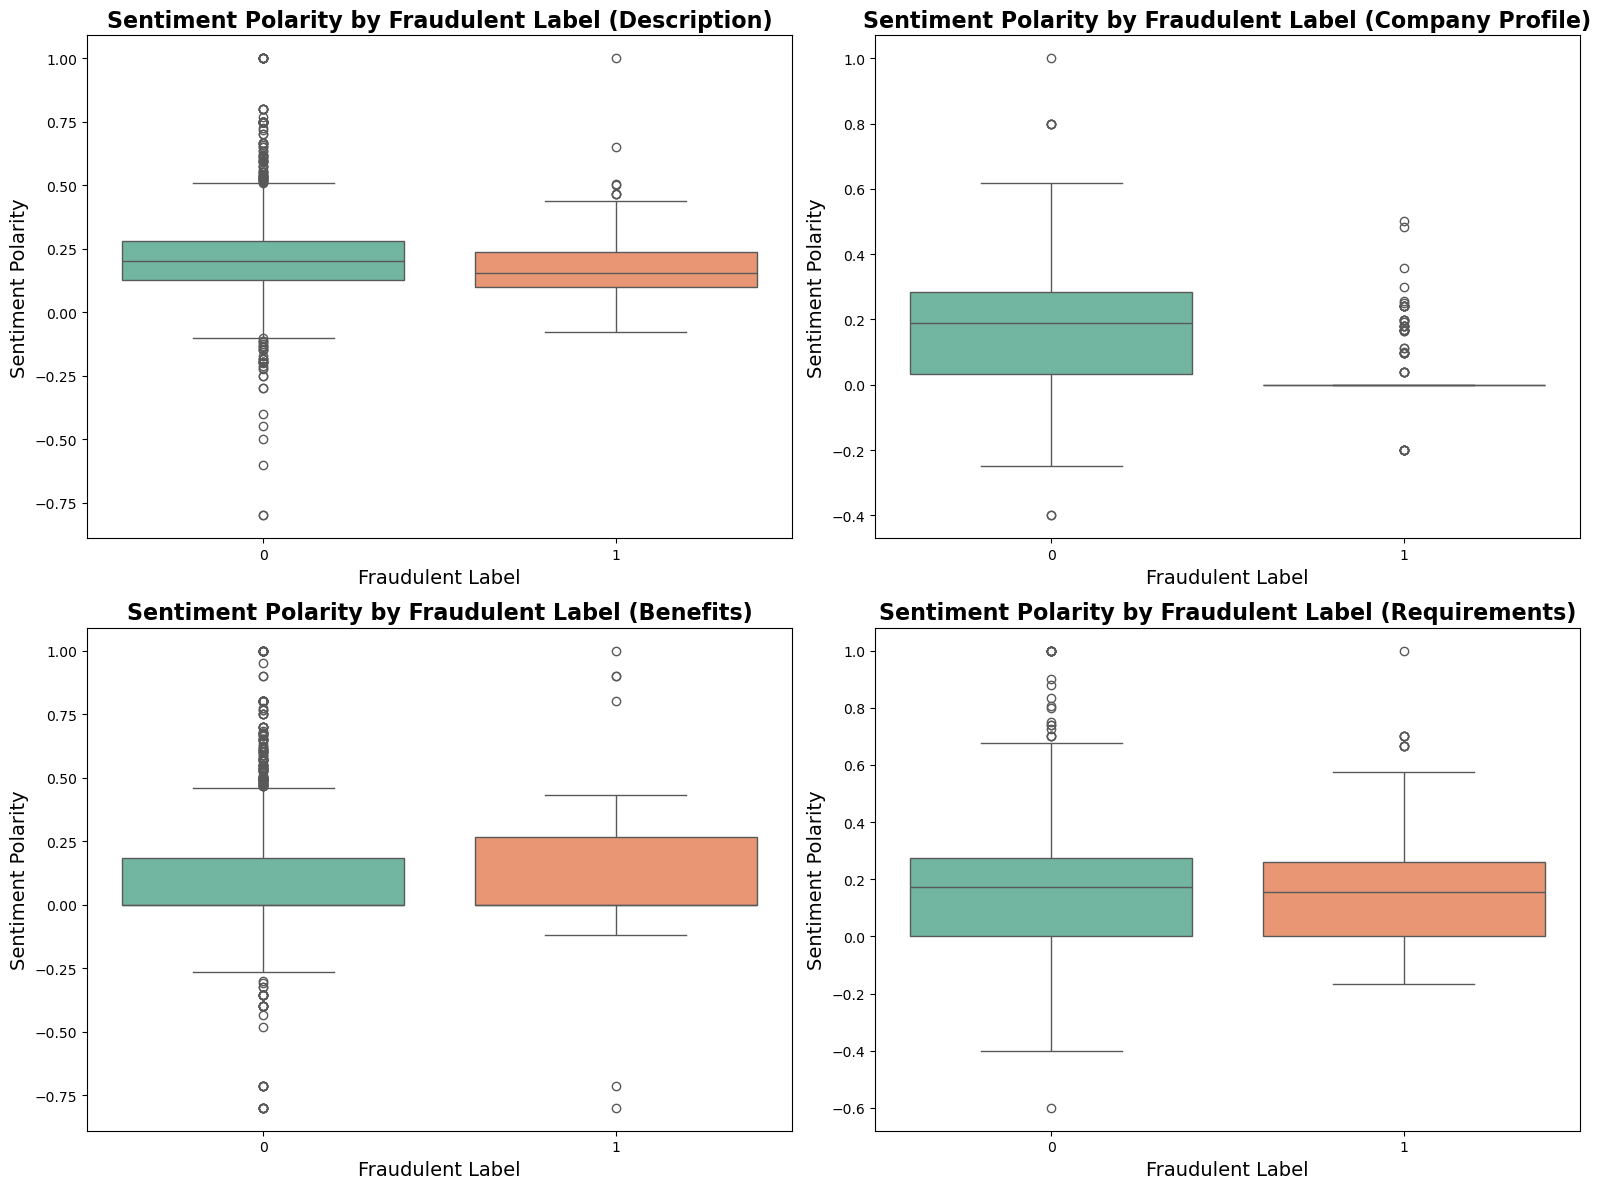

In [32]:
from textblob import TextBlob  # Ensure TextBlob is imported

# Sentiment analysis for all text columns
def get_sentiment(text):
    if isinstance(text, str):  # Ensuring text is a string
        blob = TextBlob(text)
        return blob.sentiment.polarity, blob.sentiment.subjectivity
    return 0, 0  # Setting a default for missing or invalid text

# Apply sentiment analysis to each text column and create new columns for polarity and subjectivity
jobs[['company_profile_sentiment', 'company_profile_subjectivity']] = jobs['company_profile'].apply(lambda x: get_sentiment(x)).apply(pd.Series)
jobs[['benefits_sentiment', 'benefits_subjectivity']] = jobs['benefits'].apply(lambda x: get_sentiment(x)).apply(pd.Series)
jobs[['requirements_sentiment', 'requirements_subjectivity']] = jobs['requirements'].apply(lambda x: get_sentiment(x)).apply(pd.Series)
jobs[['description_sentiment', 'description_subjectivity']] = jobs['description'].apply(lambda x: get_sentiment(x)).apply(pd.Series)

# Plotting sentiment polarity by 'fraudulent' label for all 4 text columns
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Description sentiment boxplot
sns.boxplot(data=jobs, x='fraudulent', y='description_sentiment', hue='fraudulent', palette='Set2', legend=False, ax=axes[0, 0])
axes[0, 0].set_title('Sentiment Polarity by Fraudulent Label (Description)', fontsize=16, fontweight='bold')
axes[0, 0].set_xlabel('Fraudulent Label', fontsize=14)
axes[0, 0].set_ylabel('Sentiment Polarity', fontsize=14)

# Company profile sentiment boxplot
sns.boxplot(data=jobs, x='fraudulent', y='company_profile_sentiment', hue='fraudulent', palette='Set2', legend=False, ax=axes[0, 1])
axes[0, 1].set_title('Sentiment Polarity by Fraudulent Label (Company Profile)', fontsize=16, fontweight='bold')
axes[0, 1].set_xlabel('Fraudulent Label', fontsize=14)
axes[0, 1].set_ylabel('Sentiment Polarity', fontsize=14)

# Benefits sentiment boxplot
sns.boxplot(data=jobs, x='fraudulent', y='benefits_sentiment', hue='fraudulent', palette='Set2', legend=False, ax=axes[1, 0])
axes[1, 0].set_title('Sentiment Polarity by Fraudulent Label (Benefits)', fontsize=16, fontweight='bold')
axes[1, 0].set_xlabel('Fraudulent Label', fontsize=14)
axes[1, 0].set_ylabel('Sentiment Polarity', fontsize=14)

# Requirements sentiment boxplot
sns.boxplot(data=jobs, x='fraudulent', y='requirements_sentiment', hue='fraudulent', palette='Set2', legend=False, ax=axes[1, 1])
axes[1, 1].set_title('Sentiment Polarity by Fraudulent Label (Requirements)', fontsize=16, fontweight='bold')
axes[1, 1].set_xlabel('Fraudulent Label', fontsize=14)
axes[1, 1].set_ylabel('Sentiment Polarity', fontsize=14)

#Display boxplot
plt.tight_layout()
plt.show()

### <center> Word Cloud Visualisation and Top 10 Words & Phrases in Real Jobs

Below are the code to generate word clouds and frequency tables to analyze textual data from both fraudulent and real job postings, focusing on four columns: ‘description’, ‘company_profile’, ‘benefits’, and ‘requirements’. For each dataset, the code filters the postings based on the fraudulent variable (fraudulent = 1 for fraudulent jobs, fraudulent = 0 for real jobs), preprocesses the text by removing stopwords, and visualizes the most frequent terms using word clouds. The generate_wordcloud function customizes and displays the word clouds, while the get_top_words function extracts and lists the most frequent terms. 

The results are shown in subplots, allowing for easy comparison between the two categories. This approach provides valuable insights into the linguistic patterns of both fraudulent and real job postings, aiding EDA, sentiment analysis, and fraud detection.

Top 10 Words for description:
         Word  Frequency
0      client   1.000000
1        work   0.992238
2        team   0.872574
3     product   0.851876
4     company   0.825356
5  experience   0.693402
6    business   0.628719
7     project   0.614489
8     support   0.611255
9    customer   0.583441

--------------------------------------------------
Top 10 Words for company_profile:
                      Word  Frequency
0                full time   1.000000
1         business process   0.791391
2             around world   0.788079
3    increase productivity   0.735099
4   document communication   0.728477
5                 business   0.708609
6             high quality   0.662252
7               amp secure   0.552980
8                long term   0.549669
11                safe amp   0.546358

--------------------------------------------------
Top 10 Words for benefits:
                 Word  Frequency
0  competitive salary   1.000000
1                work   0.982818
2            

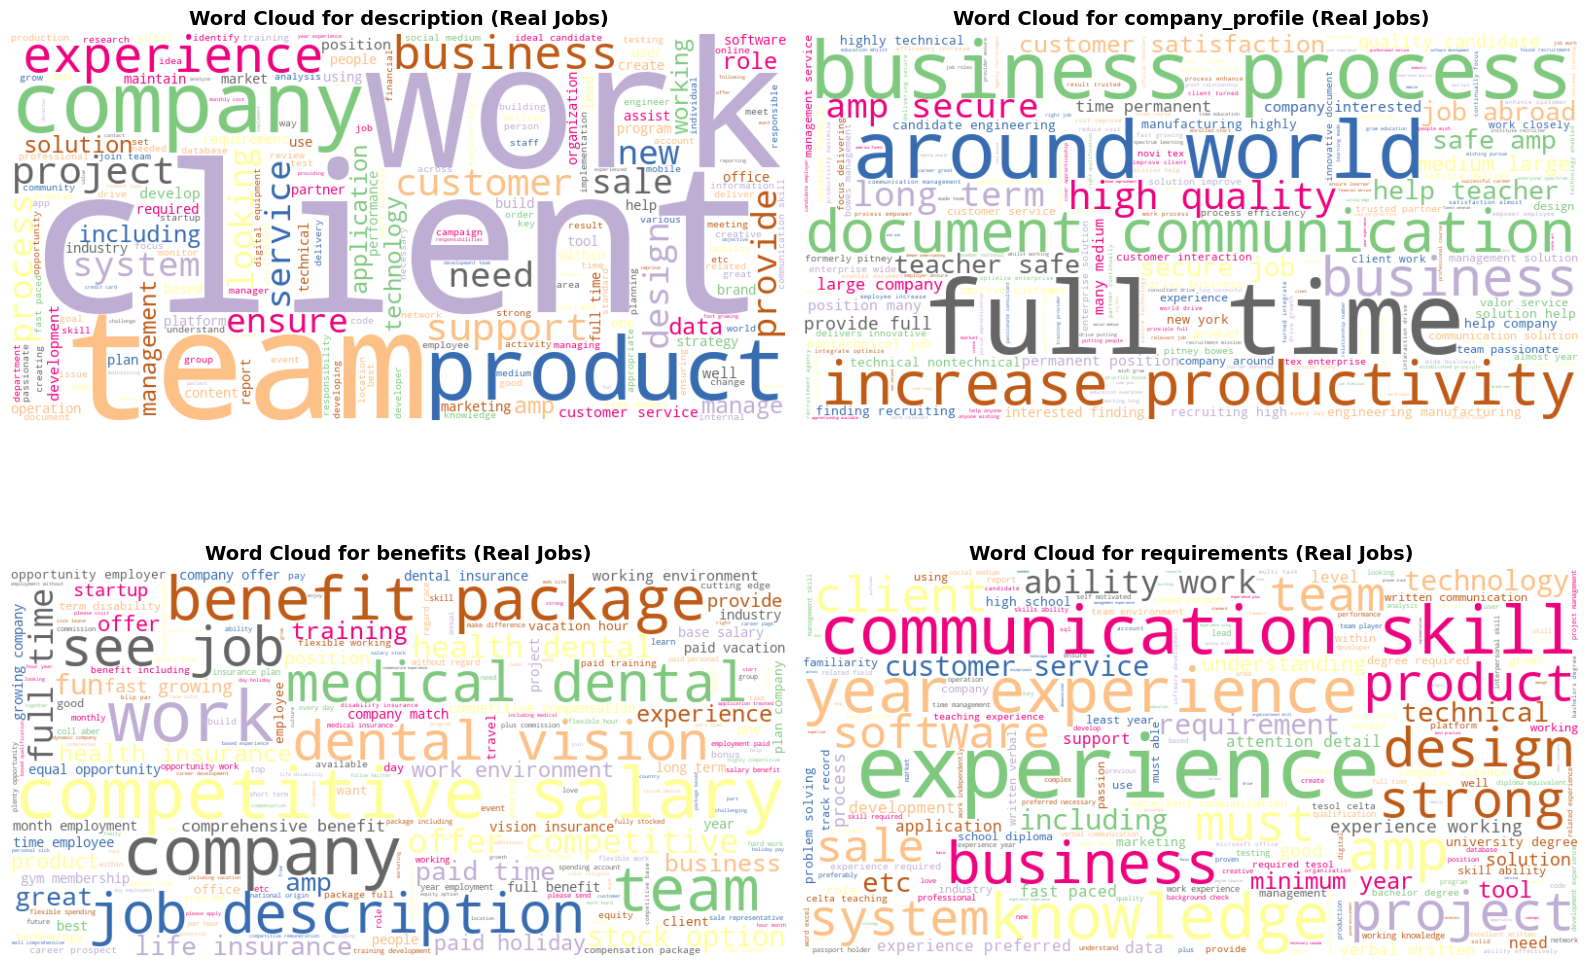

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd

# Filter the DataFrame to include only real job postings (fraudulent = 0)
real_jobs = jobs[jobs['fraudulent'] == 0]

# texual columns 
text_columns = ['description', 'company_profile', 'benefits', 'requirements']

# Function to preprocess text ensuring consistentcy 
def preprocess_text(text):
    stopwords = set(STOPWORDS)
    words = text.lower().split()  # Convert to lowercase and split into words
    words = [word for word in words if word not in stopwords and len(word) > 2]  # Exclude stopwords and short words
    return ' '.join(words)

# Function to generate word clouds for columns and label
def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        # adjustment to the words for better readibility 
        width=800, 
        height=400, 
        background_color='white', 
        stopwords=STOPWORDS,
        colormap='Accent', 
        contour_color='black',  
        contour_width=2        
    ).generate(text)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14, fontweight='bold')
    return wordcloud

# Function to get top words/phrases
def get_top_words(text, n=10):
    wordcloud = WordCloud(
        # adjustment to the words for better readibility 
        stopwords=STOPWORDS, 
        background_color='white', 
        width=800, 
        height=400,
        colormap='Accent', 
    ).generate(text)
    
    #Extract word frequencies from wordcloud
    word_frequencies = wordcloud.words_
    
    # Create a DataFrame and sorting by frequency
    df = pd.DataFrame(word_frequencies.items(), columns=['Word', 'Frequency'])
    df = df.sort_values(by='Frequency', ascending=False).head(n)
    
    return df

# Create a figure with subplots to display 4 word clouds
plt.figure(figsize=(16, 12))

# Loop through each column and generate a word cloud for real job postings
for i, column in enumerate(text_columns):
    # Concatenate all the text in the column into a single string for real jobs
    text = ' '.join(real_jobs[column].dropna())  # Concatenate the text, ignoring NaN values
    
    # Preprocess the text before generating the word cloud
    cleaned_text = preprocess_text(text)
    
    # Generating the word cloud
    plt.subplot(2, 2, i+1)  # 2 rows, 2 columns, position (i+1)
    generate_wordcloud(cleaned_text, f'Word Cloud for {column} (Real Jobs)')
    
    # Get and display the top words/phrases in a table for each column
    top_words_df = get_top_words(cleaned_text, n=10)
    print(f"Top 10 Words for {column}:")
    print(top_words_df)
    print("\n" + "-"*50)

# Show the plot with all 4 word clouds
plt.tight_layout()
plt.show()

### <center> Word Cloud Visualisation and Top 10 Words & Phrases in Fraudulent Jobs

Top 10 Words for description (Fraudulent Jobs):
          Word  Frequency
0      company   1.000000
1      product   0.959677
2      project   0.951613
3         work   0.895161
4      support   0.701613
5       ensure   0.669355
6      process   0.637097
7  engineering   0.629032
8       client   0.620968
9       system   0.612903

--------------------------------------------------
Top 10 Words for company_profile (Fraudulent Jobs):
                  Word  Frequency
0        signing bonus   1.000000
1    aptitude staffing   1.000000
2     refined resource   0.772727
3    leveraging career   0.772727
4          real estate   0.681818
5    staffing solution   0.681818
6      candidate enjoy   0.636364
7     employee receive   0.636364
8         small medium   0.545455
16  relocation service   0.500000

--------------------------------------------------
Top 10 Words for benefits (Fraudulent Jobs):
                Word  Frequency
0            company   1.000000
1    benefit package   0.55

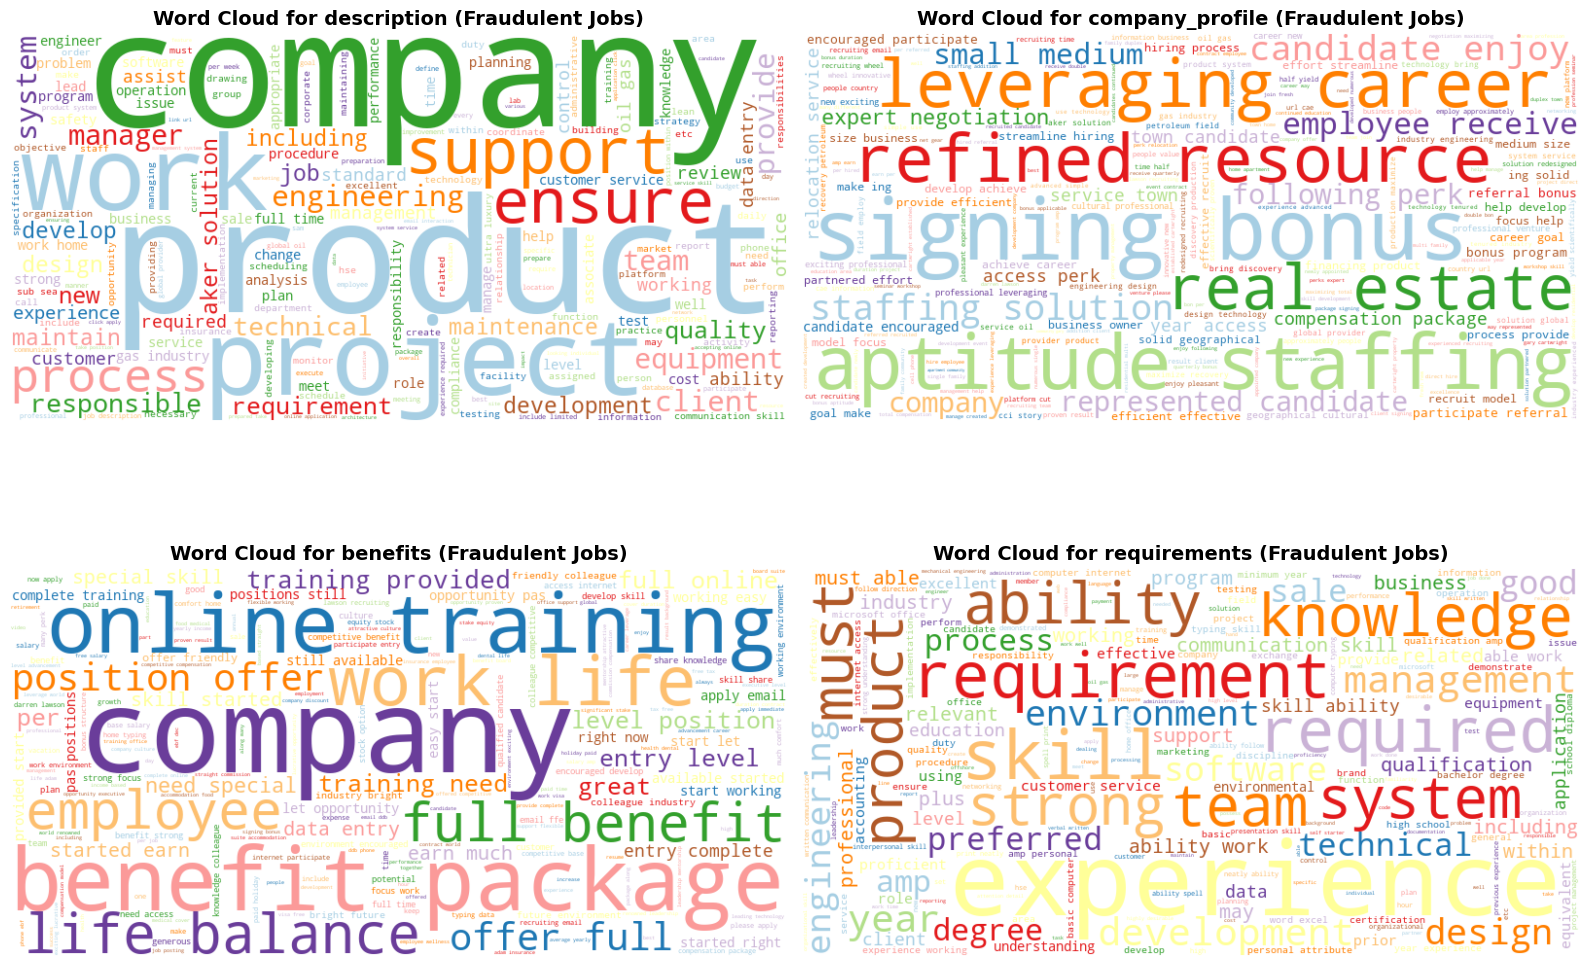

In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd

# Filter the DataFrame to include only fraudulent job postings (fraudulent = 1)
fraudulent_jobs = jobs[jobs['fraudulent'] == 1]

# texual columns 
text_columns = ['description', 'company_profile', 'benefits', 'requirements']

# Function to preprocess text ensuring consistentcy 
def preprocess_text(text):
    stopwords = set(STOPWORDS)
    words = text.lower().split()  # Convert to lowercase and split into words
    words = [word for word in words if word not in stopwords and len(word) > 2]  # Exclude stopwords and short words
    return ' '.join(words)

# Function to generate word clouds for columns and label
def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        # adjustment to the words for better readibility 
        width=800, 
        height=400, 
        background_color='white', 
        stopwords=STOPWORDS,
        colormap='Paired', 
        contour_color='black',  
        contour_width=2        
    ).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14, fontweight='bold')
    return wordcloud

# Function to get top words/phrases
def get_top_words(text, n=10):
    wordcloud = WordCloud(
        stopwords=STOPWORDS, 
        # adjustment to the words for better readibility 
        background_color='white', 
        width=800, 
        height=400,
        colormap='Paired', 
    ).generate(text)
    
    # Extract word frequencies from wordcloud
    word_frequencies = wordcloud.words_
    
    # Creating a DataFrame and sorting by frequency
    df = pd.DataFrame(word_frequencies.items(), columns=['Word', 'Frequency'])
    df = df.sort_values(by='Frequency', ascending=False).head(n)
    
    return df

# Create a figure with subplots to display 4 word clouds for fraudulent jobs
plt.figure(figsize=(16, 12))

# Loop through each column and generate a word cloud for fraudulent job postings
for i, column in enumerate(text_columns):
    # Concatenate all the text in the column into a single string for fraudulent jobs
    text = ' '.join(fraudulent_jobs[column].dropna())  # Concatenate the text, ignoring NaN values
    
    # Preprocess the text before generating the word cloud
    cleaned_text = preprocess_text(text)
    
    # Generating the word cloud
    plt.subplot(2, 2, i+1)  # 2 rows, 2 columns, position (i+1)
    generate_wordcloud(cleaned_text, f'Word Cloud for {column} (Fraudulent Jobs)')
    
    # Get and display the top words/phrases in a table for each column
    top_words_df = get_top_words(cleaned_text, n=10)
    print(f"Top 10 Words for {column} (Fraudulent Jobs):")
    print(top_words_df)
    print("\n" + "-"*50)

# Show the plot with all 4 word clouds
plt.tight_layout()
plt.show()

The word clouds and frequency tables for fraudulent job postings offer valuable insights into the linguistic patterns used in descriptions, company profiles, benefits, and requirements. These analyses are crucial for both EDA and sentiment analysis, providing a clear view of recurring terms and their potential implications. By examining the language used in these postings, we can identify key features that differentiate fraudulent listings from legitimate ones.

Descriptions: In the description section of job postings, frequent use of terms like "company," "product," and "project" is common among fraudulent listings. These words are broad and generic, often designed to appeal to a wide audience, which is characteristic of fraudulent job postings that aim to cast a wide net without offering specific details. This lack of specificity can serve as a critical indicator of fraudulent activity, particularly when compared to the more precise language typically found in legitimate postings. Non-fraudulent job descriptions, by contrast, tend to emphasize words like "client," "team," and "support," suggesting a more structured approach with clear job responsibilities and expectations. The difference in language use highlights that fraudulent postings often lack concrete details, making them more vague and less trustworthy.

Company Profile: Similarly, in the company profile section, fraudulent postings tend to use enticing and sometimes overly professional-sounding terms like "signing bonus," "aptitude staffing," and "real estate." These words are often associated with scams that promise high rewards or a quick path to success, creating an illusion of legitimacy. On the other hand, legitimate job postings use more grounded and conventional terminology such as "full-time," "business process," and "around the world," which reflects a more traditional and professional tone. The use of exaggerated or unrealistic language in fraudulent postings stands out as a significant red flag for potential job seekers. This pattern is also valuable for sentiment analysis, as overly positive language in fraudulent postings could skew sentiment scores, revealing clues about their deceptive nature.

Benefits: The benefits section of fraudulent job postings frequently features terms like "online training," "benefit package," and "work-life balance," which are often used in scams to attract job seekers with promises of easy work conditions or unrealistic perks. These terms are often seen in postings that exaggerate the benefits of a job to lure applicants in. In contrast, legitimate job postings generally mention more practical and realistic benefits such as "competitive salary," "medical benefits," and "dental benefits," signaling structured, tangible compensation offerings. The exaggerated claims in fraudulent postings suggest that job seekers should approach these listings with caution. These findings are especially relevant in EDA, where patterns of unrealistic promises can inform hypotheses about the types of fraud indicators that are common in such job postings.

Requirements: In the requirements section, both fraudulent and non-fraudulent postings share common terms like "experience," "skill," and "team." While these terms are present in both types of postings, the context and specificity of the language are often more concrete in legitimate job postings. Fraudulent job listings, however, may use these terms in a more ambiguous manner, lacking the detailed qualifications or skills that are typically associated with a legitimate job description. For example, while both types of postings may mention "experience" or "team," fraudulent postings often fail to specify the type of experience or the exact team dynamics, leading to a lack of clarity about the job's expectations. This pattern of vague language can be a key indicator when distinguishing fraudulent job postings from genuine ones.

Overall, the visualizations from the word clouds and frequency tables provide essential insights for both EDA and sentiment analysis. They highlight patterns in language that can be used to identify characteristics unique to fraudulent job postings, such as exaggerated benefits, vague descriptions, and unrealistic company profiles. These linguistic patterns are critical for developing predictive models to detect fraud. Additionally, the recurring use of overly positive or non-specific language in fraudulent postings can offer actionable insights into how these texts differ from legitimate ones in terms of tone and content.

Furthermore, these analyses bridge the raw data with actionable insights, guiding the identification of fraud-specific features that can be used for more effective fraud detection models. For sentiment analysis, recognizing the differences in language and tone between fraudulent and legitimate postings allows for a more nuanced understanding of how sentiment may skew in the presence of deceptive language.


### 9.2. Metadata Explration

### <center> Bar Plot Visualisation of Categorical Variables

To analyze the distribution of categorical variables against the target variable ‘fraudulent’, I used the countplot() function from Seaborn. This function creates bar plots to visualize the frequency of each category within a variable, grouped by the target variable. By applying this to features like ‘employment_type’, ‘required_experience’, and ‘required_education’, I was able to rank the categories based on their counts and uncover patterns that differentiate fraudulent and real job postings.

The analysis revealed that both fraudulent and real job postings predominantly listed full-time positions. However, deeper insights emerged when exploring the ‘required_experience’ feature. Fraudulent postings primarily targeted entry-level candidates, while real postings often sought individuals with mid-to-senior-level experience. This pattern suggests that fraudulent postings are designed to appeal to a more vulnerable demographic—those with limited experience who may lack familiarity with job market scams.

In terms of ‘required_education’, fraudulent postings frequently specified minimal qualifications, such as a high school diploma or equivalent. On the other hand, real job postings typically require a bachelor’s degree. This clear distinction underscores a targeted approach by fraudulent postings to attract individuals with lower qualifications, who may be less critical of job authenticity.

The combination of targeting entry-level experience and minimal educational requirements in fraudulent postings highlights a strategic effort to reach a broader and potentially less discerning audience. This approach enables scammers to exploit unsuspecting job seekers more effectively.


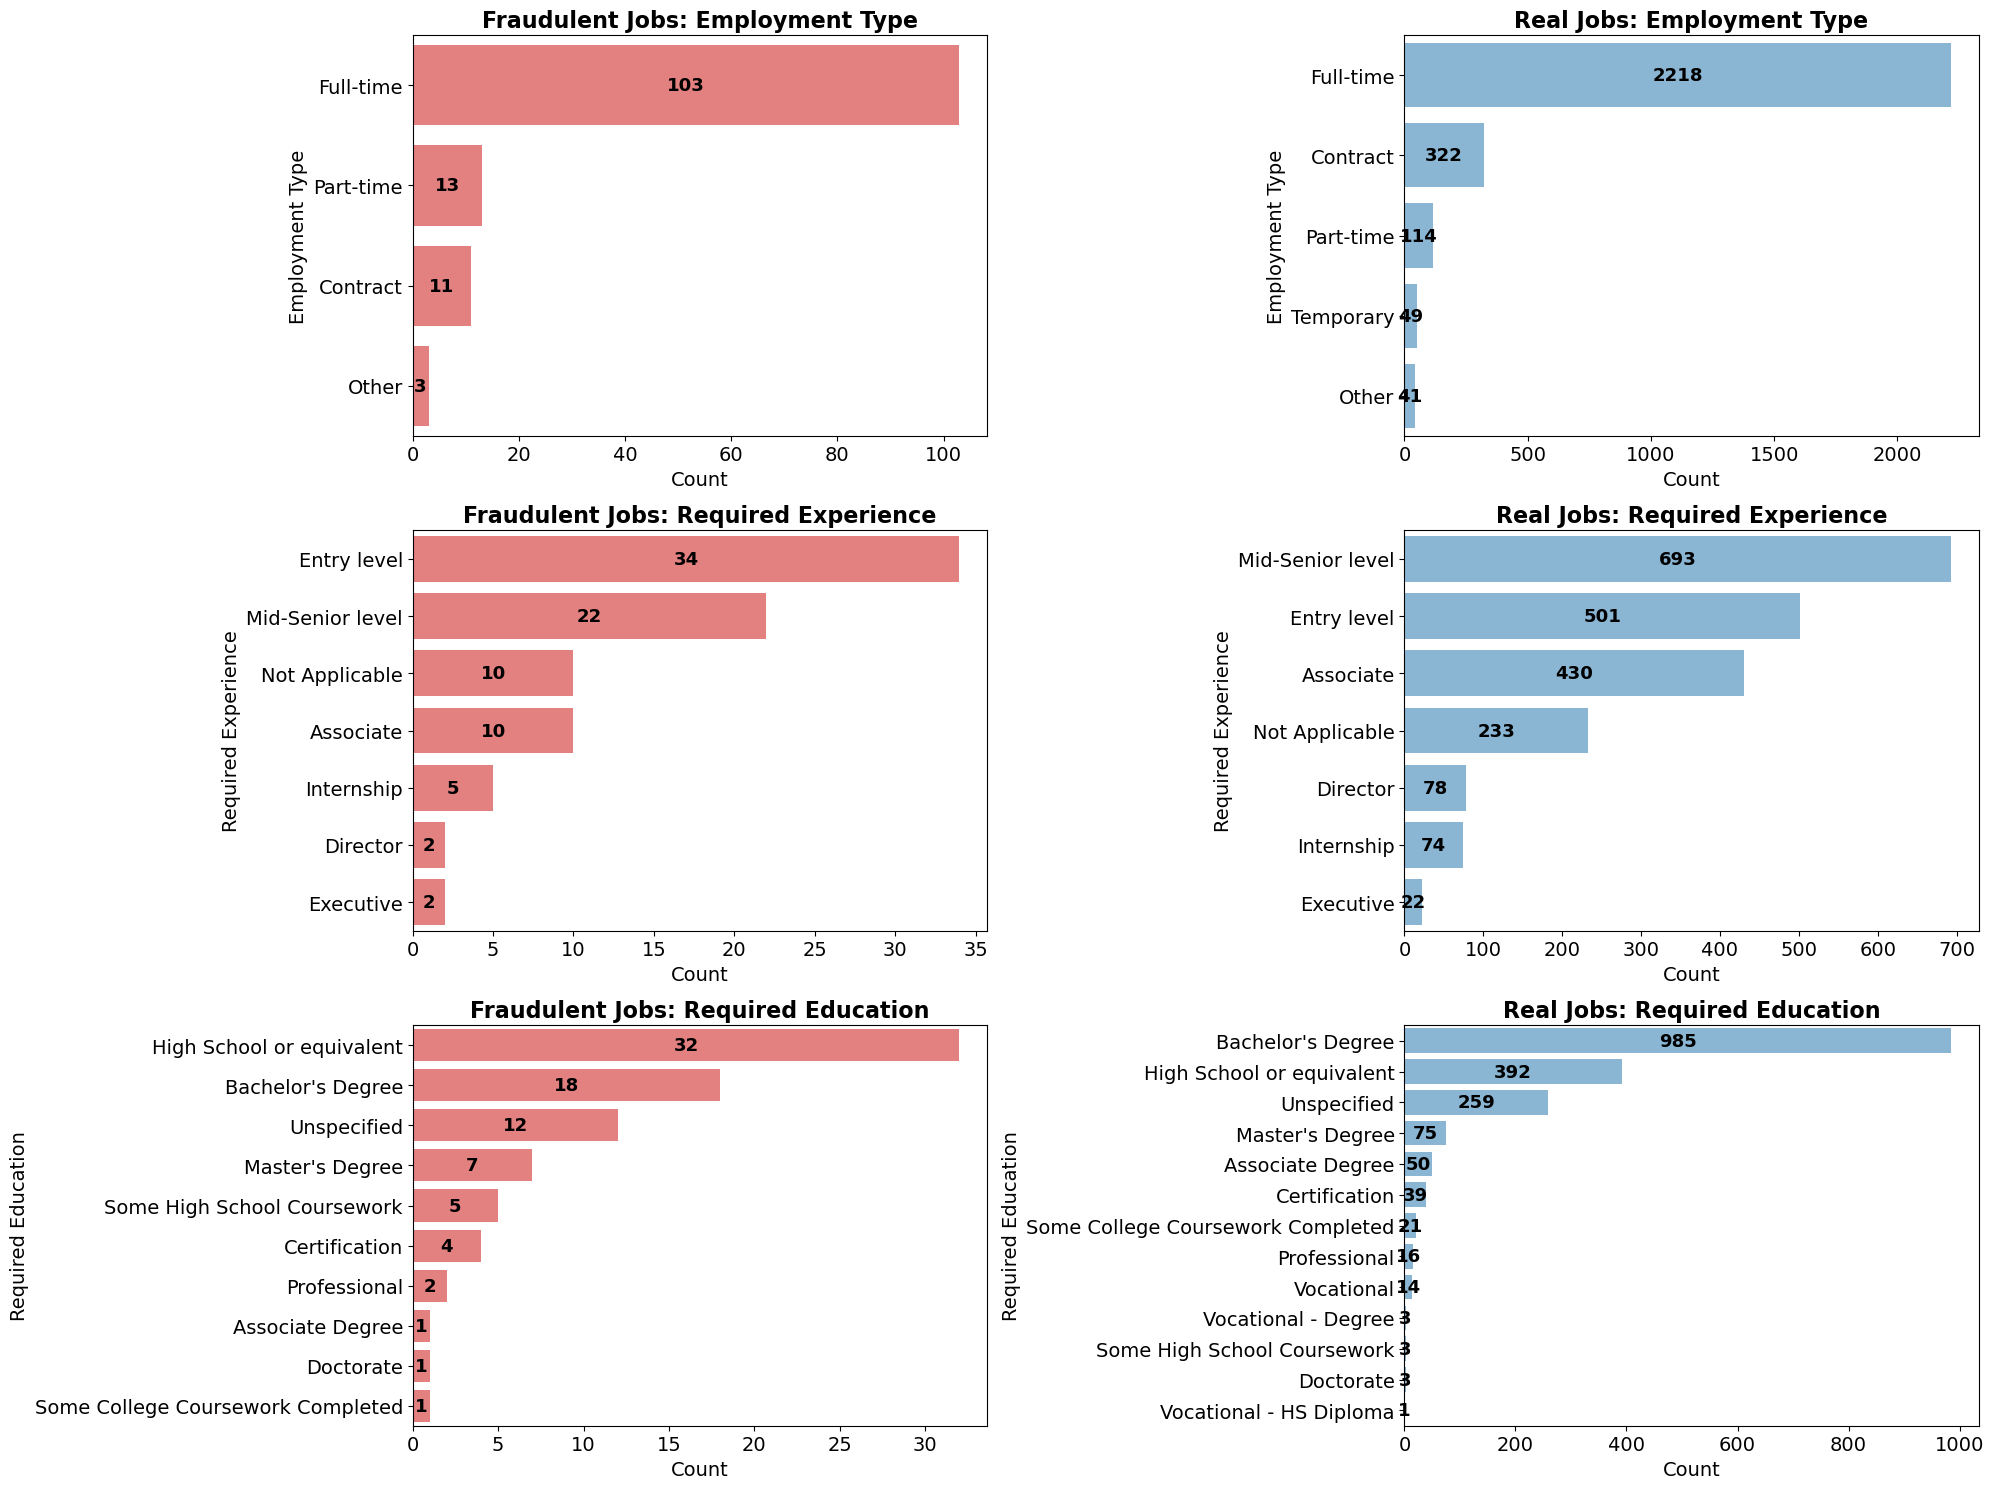

In [35]:
# List of categorical columns for visualising
categorical_columns = ['employment_type', 'required_experience', 'required_education']
titles = ['Employment Type', 'Required Experience', 'Required Education']

plt.figure(figsize=(20, 15))

# for loop to Loop through each categorical column
for i, col in enumerate(categorical_columns):
    # Filter out rows with missing data in the current column and remove empty strings or NaN values
    data_fraudulent = jobs[jobs['fraudulent'] == 1]
    data_real = jobs[jobs['fraudulent'] == 0]
    
    # Drop rows where the column value is null or empty (taking into consideration that empty strings are also considered blanks)
    data_fraudulent = data_fraudulent[data_fraudulent[col].notna() & (data_fraudulent[col] != '')]
    data_real = data_real[data_real[col].notna() & (data_real[col] != '')]

    # Subplot for fraudulent jobs
    plt.subplot(3, 2, i * 2 + 1)
    ax = sns.countplot(
        y=col,
        data=data_fraudulent,
        order=data_fraudulent[col].value_counts().index,
        color='#F36F6F',  # color code it to pinkish red
    )
    plt.title(f'Fraudulent Jobs: {titles[i]}', fontsize=16, fontweight='bold')
    plt.xlabel('Count', fontsize=14)
    plt.ylabel(col.replace('_', ' ').title(), fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Add frequency counts in the middle of the bars for fraudulent jobs with bold font for readiblity 
    for p in ax.patches:
        ax.text(
            p.get_width() / 2,  # Positioning it in the center of the bar
            p.get_y() + p.get_height() / 2,  # Vertically centered
            f'{int(p.get_width())}',  # Display frequency
            ha='center', va='center', fontsize=13, color='black', fontweight='bold'  # Bold font
        )

    # Subplot for real jobs
    plt.subplot(3, 2, i * 2 + 2)
    ax = sns.countplot(
        y=col,
        data=data_real,
        order=data_real[col].value_counts().index,
        color='#7EB9E0',  # color code it to blue
    )
    plt.title(f'Real Jobs: {titles[i]}', fontsize=16, fontweight='bold')
    plt.xlabel('Count', fontsize=14)
    plt.ylabel(col.replace('_', ' ').title(), fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Add frequency labels in the middle of the bars for real jobs with bold font
    for p in ax.patches:
        ax.text(
            p.get_width() / 2,  # Positioning it in the center of the bar
            p.get_y() + p.get_height() / 2,  # Vertically centered
            f'{int(p.get_width())}',  # Display frequency
            ha='center', va='center', fontsize=13, color='black', fontweight='bold'  # Bold font
        )

plt.tight_layout()  # Ensures no overlap and a clean layout
plt.show()

### <center> Bar Plot Visualization of Top Industries in Real vs Fraudulent Jobs

To analyze industry distribution, I used the value_counts() function to calculate the frequency of industries within the dataset, separated by fraudulent and non-fraudulent job postings. By applying .head(top_n) to the results, I extracted the top 10 industries for each category. This approach efficiently highlighted the most common industries associated with fraudulent and legitimate job postings.

The analysis revealed that the top three industries for fraudulent job postings were oil and energy, accounting, and real estate. These industries are often associated with lucrative opportunities, making them attractive targets for scammers aiming to exploit job seekers with enticing, yet deceptive, offers. Fraudulent postings in these industries may rely on the perception of high salaries, financial stability, or rapid career growth to lure victims.

On the other hand, non-fraudulent job postings were predominantly concentrated in information technology and services, computer software, and internet-related industries. These industries typically reflect the broader demand for skilled professionals in technology and digital fields. Legitimate employers in these sectors often post detailed and authentic job descriptions to attract qualified candidates.

This distinction in industry concentration suggests that fraudulent postings are strategically targeted at industries with high perceived value or appeal to job seekers, particularly those seeking opportunities in traditionally profitable sectors. Conversely, non-fraudulent postings tend to align with current workforce trends and legitimate business needs, such as the ongoing demand for IT professionals.

These findings provide actionable insights for detecting fraudulent postings by highlighting industries where fraudulent activity is more likely to occur, allowing for targeted analysis or additional scrutiny in these sectors.


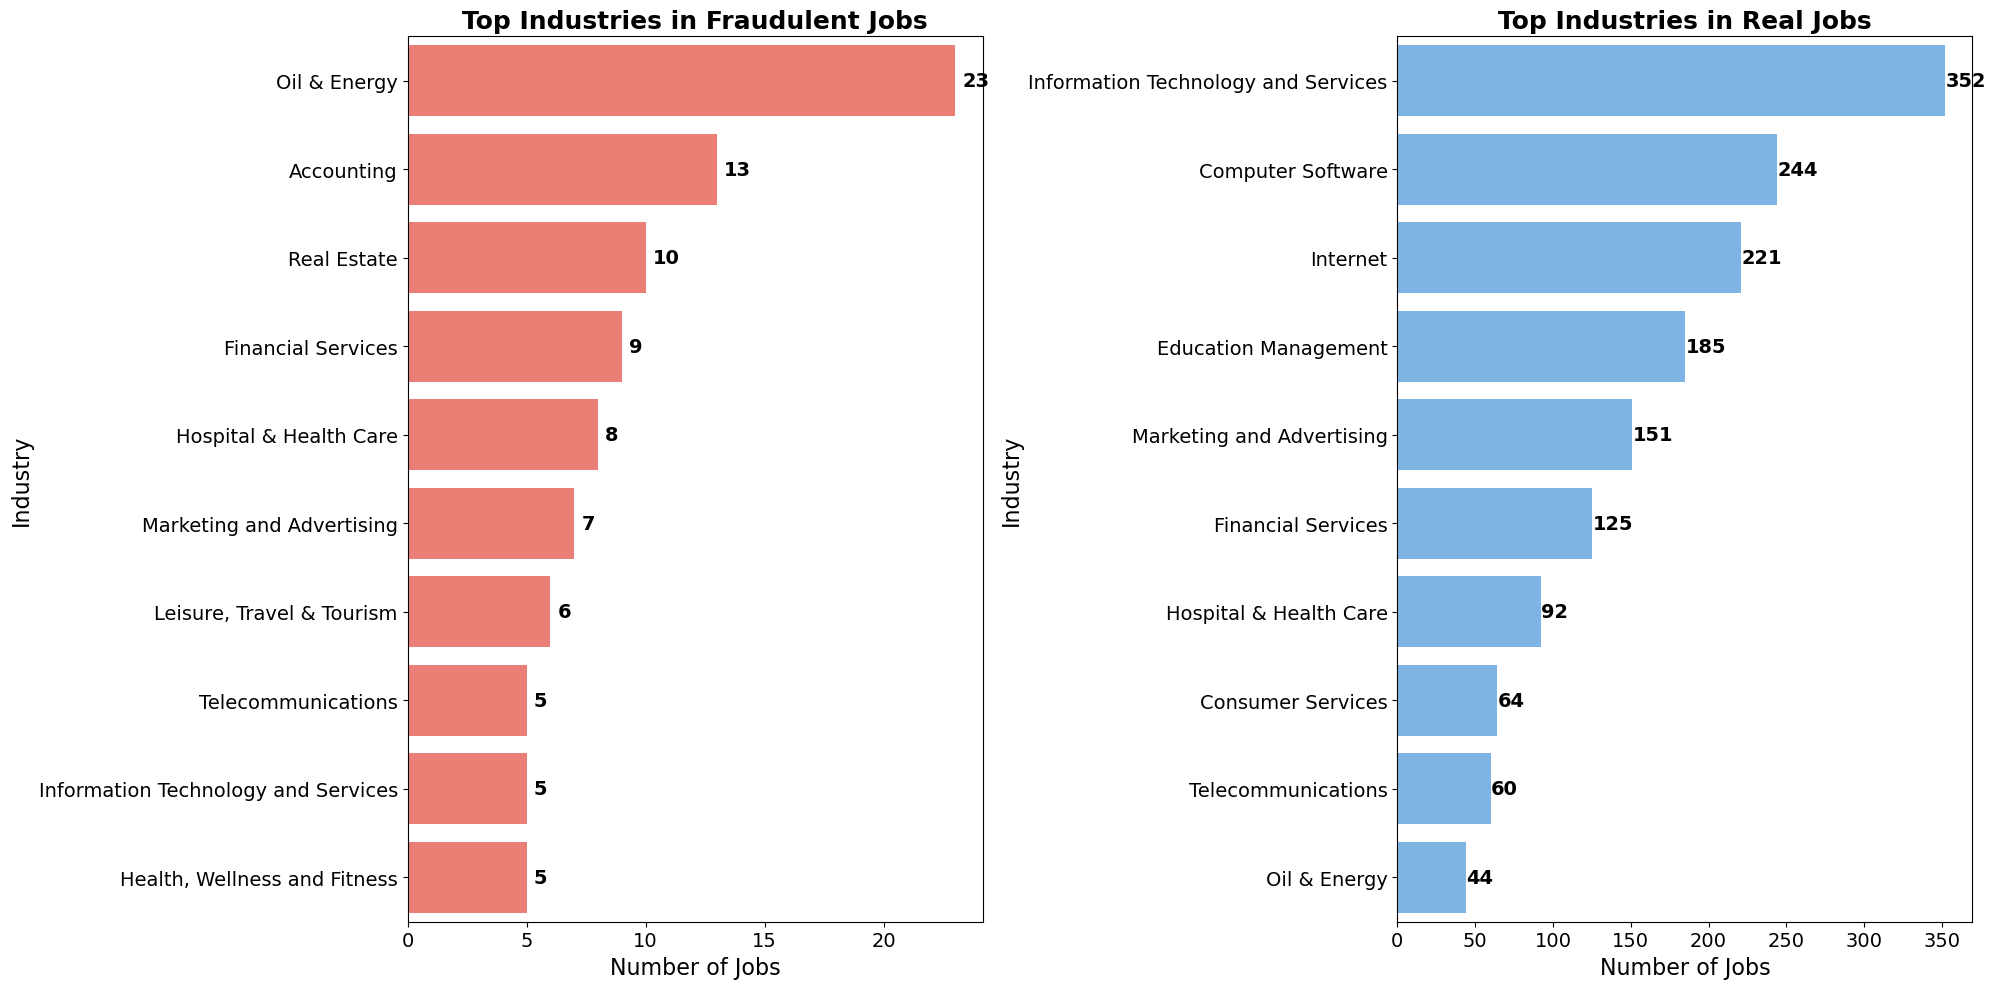

In [36]:
# List of top industries for visualising
top_n = 10  # 10 industries to be shown 

# To filter out empty string or NaN values in 'industry'
data_fraudulent = jobs[jobs['fraudulent'] == 1]
data_real = jobs[jobs['fraudulent'] == 0]  

# Remove rows with empty or NaN values in 'industry' column
data_fraudulent = data_fraudulent[data_fraudulent['industry'].notna() & (data_fraudulent['industry'] != '')]
data_real = data_real[data_real['industry'].notna() & (data_real['industry'] != '')]

# Get the top 10 industries for fraudulent jobs
top_industries_fraudulent = data_fraudulent['industry'].value_counts().head(top_n)

# Get the top 10 industries for real jobs
top_industries_real = data_real['industry'].value_counts().head(top_n)

# Set up the plot
plt.figure(figsize=(20, 10))

# Subplot for fraudulent jobs
plt.subplot(1, 2, 1)
ax = sns.barplot(
    y=top_industries_fraudulent.index,
    x=top_industries_fraudulent.values,
    color='#FF6F61',  # color code it to coral red
)
# Sizing of fonts
plt.title('Top Industries in Fraudulent Jobs', fontsize=18, fontweight='bold')
plt.xlabel('Number of Jobs', fontsize=16)  
plt.ylabel('Industry', fontsize=16)  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14) 

# Adding frequency labels to bars for fraudulent jobs
for p in ax.patches:
    ax.text(
        p.get_width() + 0.3,  # Positioning of the text (right)
        p.get_y() + p.get_height() / 2,  # Center vertically
        f'{int(p.get_width())}',  # Displaying frequency count
        ha='left', va='center', fontsize=14, color='black', fontweight='bold'  # Ensure text is bold and readable 
    )

# Subplot for real jobs
plt.subplot(1, 2, 2)
ax = sns.barplot(
    y=top_industries_real.index,
    x=top_industries_real.values,
    color='#6CB5F5',  # color code it to blue
)
# Sizing of fonts 
plt.title('Top Industries in Real Jobs', fontsize=18, fontweight='bold')
plt.xlabel('Number of Jobs', fontsize=16) 
plt.ylabel('Industry', fontsize=16) 
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

# Add frequency labels to bars for real jobs
for p in ax.patches:
    ax.text(
        p.get_width() + 0.3,  # Positioning of the text (right)
        p.get_y() + p.get_height() / 2,  # Center vertically
        f'{int(p.get_width())}',  # Displaying frequency count
        ha='left', va='center', fontsize=14, color='black', fontweight='bold'  # Ensure text is bold and readable 
    )

plt.tight_layout()
plt.show()

### <center> Bar Plot Visualisation of Binary Variables

The codes below illustrate the process and output of bar plot visualizations for the binary variables ‘telecommuting’, ‘has_company_logo’, and ‘has_questions’ against the target variable ‘fraudulent’. The code for this process involved grouping the data by the target variable and calculating counts for each binary feature. The resulting data was then visualized using Python’s Matplotlib and Seaborn libraries. The countplot() function from Seaborn was employed to create the bar plots, as it efficiently displays the distribution of binary variables in relation to a target variable. The bar plots provided a clear visual representation of the relationships between these features and the likelihood of a job posting being fraudulent.

Company Logo: One significant finding, as shown in the bar plot, was the absence of company logos in fraudulent postings. Of the 181 fraudulent job postings, 125 (approximately 69%) lacked company logos, compared to only 656 out of 3,395 real job postings (approximately 19%) missing logos. This stark contrast highlights the absence of logos as a key characteristic of fraudulent postings. The lack of company logos suggests that scammers often avoid creating a legitimate online presence, possibly to minimize effort or avoid scrutiny.

Telecommuting: The analysis of the ‘telecommuting’ variable revealed that both fraudulent and real job postings are more inclined towards non-telecommuting positions. The similar distributions across both classes indicate that telecommuting is not a distinguishing feature for identifying fraudulent postings. Consequently, this insight does not add significant value to the fraud detection process.

Screening Questions: The analysis of the ‘has_questions’ variable, which indicates whether screening questions are included in the job posting, revealed distinct patterns. Among fraudulent postings, 130 out of 181 (approximately 72%) did not include screening questions, while only 51 (approximately 28%) had them. In contrast, real job postings showed a more balanced distribution: 1,681 out of 3,395 (approximately 49%) lacked screening questions, while 1,714 (approximately 51%) included them. This finding suggests that the absence of screening questions is more common in fraudulent postings. Fraudsters may deliberately avoid screening questions to reduce complexity and make the application process as easy as possible for potential victims. Conversely, real job postings often include screening questions to filter applicants and assess their suitability, reflecting standard hiring practices.


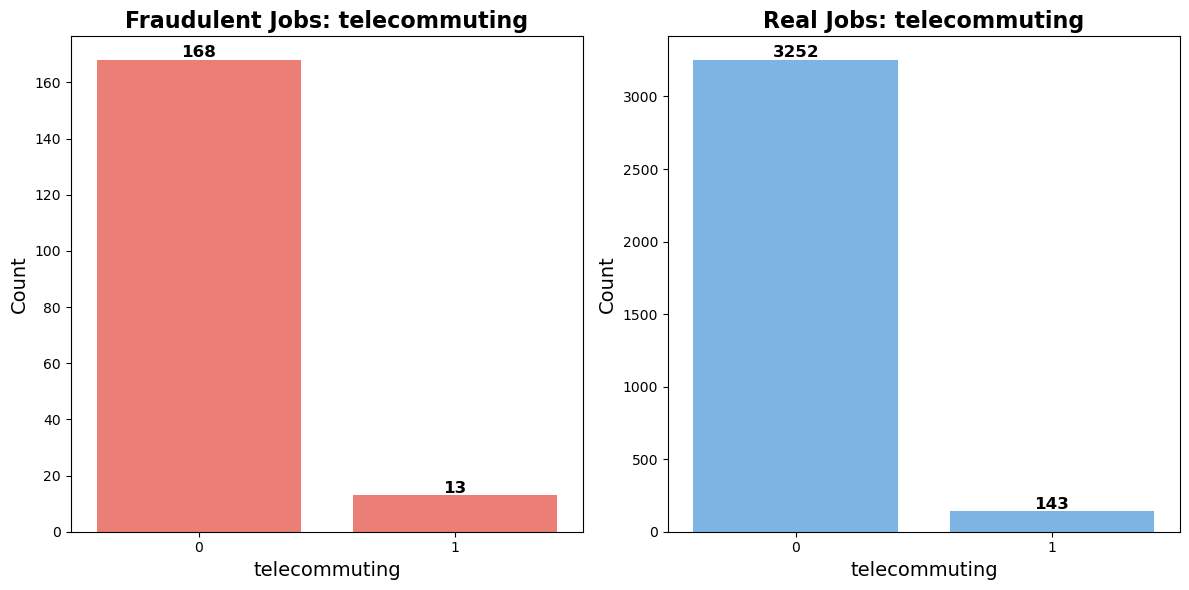

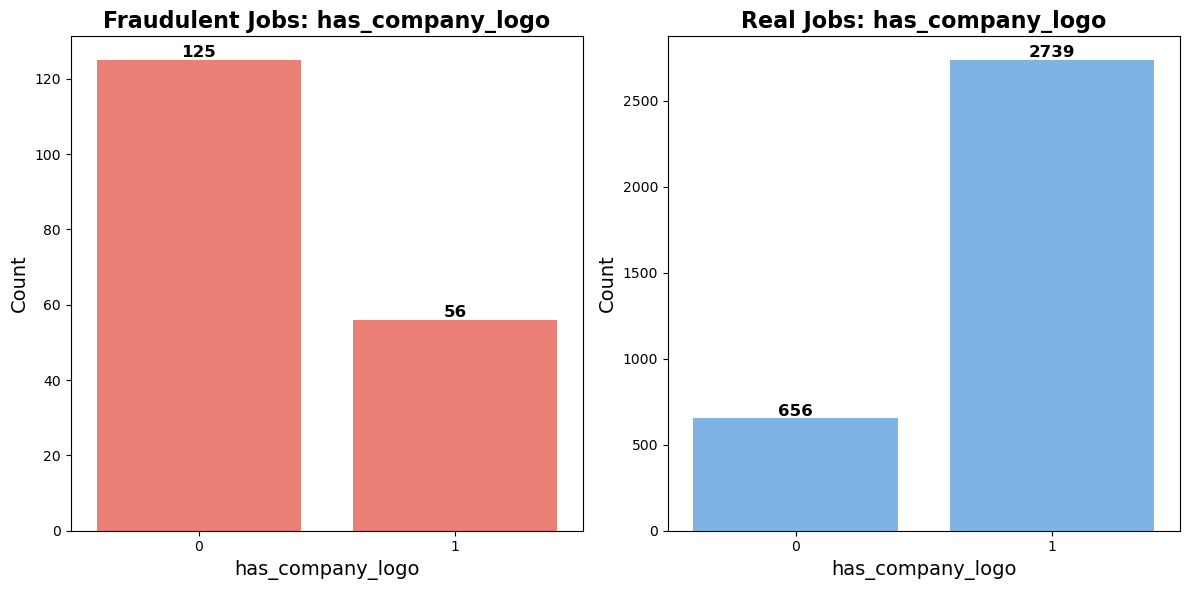

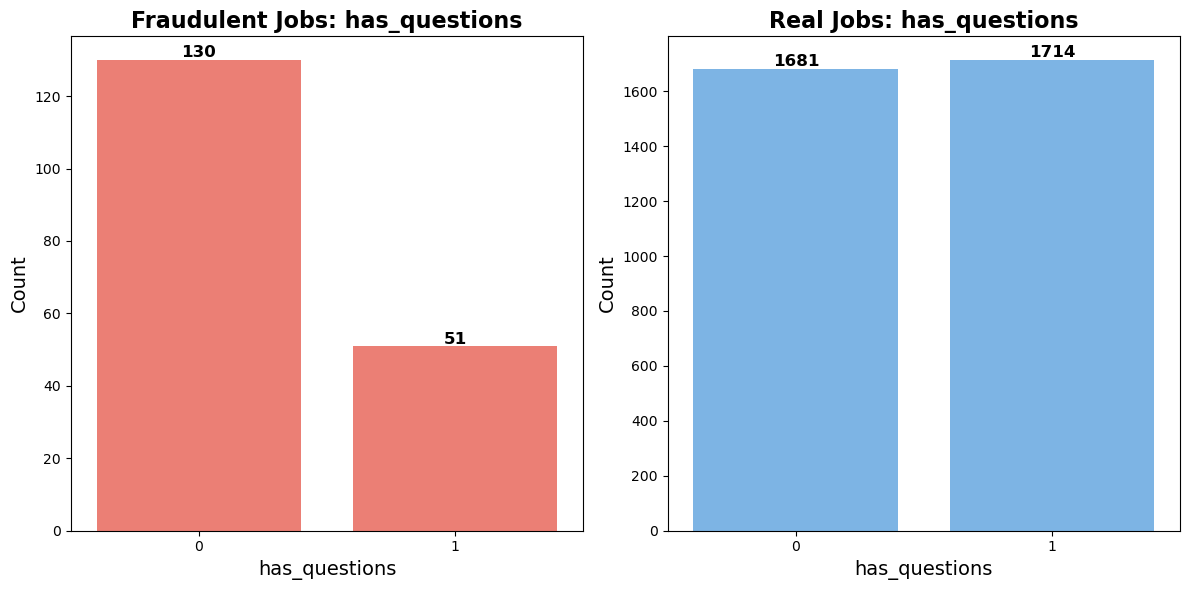

In [37]:
# Binary features for visualising
binary_features = ['telecommuting', 'has_company_logo', 'has_questions']

# Plot for each binary feature
for feature in binary_features:
    plt.figure(figsize=(12, 6))
    
    # Fraudulent Jobs
    plt.subplot(1, 2, 1)
    ax1 = sns.countplot(
        x=feature,
        data=jobs[jobs['fraudulent'] == 1],
        color='#FF6F61'  # color code it to coral red
    )
    plt.title(f'Fraudulent Jobs: {feature}', fontsize=16, fontweight='bold')
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Count', fontsize=14)

    # Add frequency count labels to the bars for fraudulent jobs
    for p in ax1.patches:
        ax1.annotate(
            f'{int(p.get_height())}',  # Displaying frequency as an integer
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Position numerics above each bar
            ha='center', va='center',  # Horizontal and vertical alignment to the text
            fontsize=12, fontweight='bold', color='black',  # Font style
            xytext=(0, 5), textcoords='offset points'  # Futher adjustments to the text position 
        )

    # Real Jobs
    plt.subplot(1, 2, 2)
    ax2 = sns.countplot(
        x=feature,
        data=jobs[jobs['fraudulent'] == 0],
        color='#6CB5F5'  # color code it to blue
    )
    plt.title(f'Real Jobs: {feature}', fontsize=16, fontweight='bold')
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Count', fontsize=14)

    # Adding frequency count labels to the bars for real jobs
    for p in ax2.patches:
        ax2.annotate(
            f'{int(p.get_height())}',  # Displaying frequency as an integer
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Position numerics above each bar
            ha='center', va='center',  # Horizontal and vertical alignment to the text
            fontsize=12, fontweight='bold', color='black',  # Font style
            xytext=(0, 5), textcoords='offset points'  # Futher adjustments to the text position 
        )

    plt.tight_layout()
    plt.show()

## 9.4. Feature Engineering Preparation

Insights from the EDA provide key guidance for feature engineering in fraud detection models. Linguistic patterns, such as vague or overly optimistic language can be used as features to distinguish fraudulent postings. Additionally, industry trends identified sectors like oil and energy as more prone to fraud, which can be captured with an industry classification feature. The analysis of experience and education levels shows that fraudulent postings often target entry-level candidates with minimal qualifications, which can be used to create features related to job requirements. In summary, the EDA highlighted distinct patterns—shorter text, vague descriptions, and missing metadata—that will guide the creation of effective features for fraud detection models.

## 10. Reflection on the Research Process

### 10.1. Strengths

The research process benefitted from a rigorous data cleaning and exploration pipeline. We
were able to identify and address several key features, such as missing values, inconsistent
formatting, and outlier data points, to ensure the dataset was suitable for analysis. This
preparation laid the groundwork for identifying meaningful patterns and trends in the job
postings. The detailed exploratory analysis, including word clouds, sentiment analysis, and 
metadata exploration, helped to uncover crucial insights into how fraudulent postings differ
from legitimate ones.

### 10.2. Challenges

There were several challenges encountered during the research process that could impact the 
robustness of the analysis. One significant hurdle was handling missing data and the imbalance
between fraudulent and legitimate postings, which could have affected model performance 
if not properly addressed. Additionally, the limited diversity in the dataset, particularly in terms of geographic location and industry, posed a challenge. Many fraudulent postings were concentrated in a small set of industries, which may not reflect the full spectrum of fraudulent activities across all sectors.

Another challenge arose from the high-dimensional nature of the textual data, particularly job
descriptions, which made it difficult to extract meaningful features without introducing noise.Furthermore, there may be bias in the labeled examples, as fraudulent postings were not always accurately labeled or classified. Addressing these issues is crucial for improving the accuracy and robustness of the analysis and subsequent fraud detection models.

### 10.3. Areas for Improvement

Future research should focus on addressing these challenges. Specifically, applying more 
advanced natural language processing (NLP) techniques, such as transformer-based models 
(e.g., BERT), could greatly improve classification accuracy and better handle the 
complex textual features of job descriptions. Additionally, expanding the dataset to include a more diverse set of postings, with a broader range of industries and geographic regions, 
will help ensure that the model generalizes well to different types of fraudulent behavior. This expansion could capture a more representative spectrum of fraudulent tactics used by scammers.

## 11. Conclusion

The research has shed light on the key characteristics that distinguish fraudulent job postings from legitimate ones, highlighting specific patterns in textual features, metadata, and sentiment. Fraudulent postings often exhibit telltale signs such as missing or incomplete metadata, vague or overly positive language, and unrealistic promises in job descriptions. These findings emphasize the importance of understanding linguistic and structural patterns in job postings to identify potential fraud.

The exploratory data analysis revealed that fraudulent job postings frequently lack 
specificity in their requirements, use exaggeratedly positive tones, or fail to provide essential company details. Such postings stand out when compared to legitimate ones, which typically offer clearer and more structured information.

By identifying these patterns, the study contributes to a broader understanding 
of the characteristics of fraudulent job postings. These insights can inform future efforts to ensure safer and more transparent online recruitment platforms. Protecting job seekers from fraud is critical to fostering trust and reliability in the recruitment process, benefitting both job seekers and employers.

## 12. References and Resources

Bansal, S. (2020) Real / fake job posting prediction, Kaggle. Available at:
https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction 
(Accessed: 06 January 2025). 

Bozkus, E. (2022) Fake news detection datasets, Kaggle. Available at:      
https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets (Accessed: 06 January 2025). 

Hab, M. (2017) Online job postings, Kaggle. Available at: https://www.kaggle.com/datasets/madhab/jobposts (Accessed: 06 January 2025). 

S, R.A. (2024) Data Visualization in Python: Overview, libraries & graphs: Simplilearn, Simplilearn.com. Available at: https://www.simplilearn.com/tutorials/python-tutorial/data-visualization-in-python (Accessed: 06 January 2025). 

Saeed, N. (2024) Scam detection using machine learning: Fraud detection python: NLP with Sckit-learn 2024, Medium. Available at: https://medium.com/@611noorsaeed/scam-detection-using-machine-learning-fraud-detection-python-nlp-with-sckit-learn-2024-bcd84e36e689 (Accessed: 06 January 2025). 

### 12.1. Data Cleaning & Processing

Yadav, P. (2023) Text data preprocessing made easy: Steps to clean text data using Python, Medium. Available at: https://medium.com/@pawan329/text-data-preprocessing-made-easy-steps-to-clean-text-data-using-python-81a138a0e0e3 (Accessed: 06 January 2025).

Kakarla, S. (2019) Cleaning text data, Kaggle. Available at: https://www.kaggle.com/code/syamkakarla/cleaning-text-data (Accessed: 06 January 2025).

### 12.2. EDA 

Godard, T. (2017) Detailed exploratory data analysis with python, Kaggle. Available at: https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python (Accessed: 06 January 2025). 


Imoore (2020) Intro to exploratory data analysis (EDA) in Python, Kaggle. Available at: https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python (Accessed: 06 January 2025).

### 12.3. NLP and Sentiment Analysis

Furkannakdagg (2022) NLP & Sentiment Analysis Tutorial, Kaggle. Available at: https://www.kaggle.com/code/furkannakdagg/nlp-sentiment-analysis-tutorial (Accessed: 06 January 2025). 

Ankumagawa (2022) Sentiment analysis: A comprehensive guide, Kaggle. Available at: https://www.kaggle.com/code/ankumagawa/sentiment-analysis-a-comprehensive-guide (Accessed: 06 January 2025). 

Jablonski, J. (2023) Natural language processing with python’s NLTK package, Real Python. Available at: https://realpython.com/nltk-nlp-python/ (Accessed: 06 January 2025). 

GeeksforGeeks (2024) Sentiment analysis using Vader - using Python, GeeksforGeeks. Available at: https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/ (Accessed: 06 January 2025). 

Suvrat (2025) Sentiment analysis using Python, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2022/07/sentiment-analysis-using-python/ (Accessed: 06 January 2025). 

Hu, M., & Liu, B. (2004). Mining and summarizing customer reviews. Proceedings of the tenth ACM SIGKDD international conference on Knowledge discovery and data mining. 

Nasrin, Samia & Ghosh, Priyanka & Mazharul, S & Chowdhury, S. M. Mazharul Hoque & Hossain, Syed. (2019). Fraud detection of Facebook business page based on sentiment analysis.

In [38]:
pip install pandoc

Note: you may need to restart the kernel to use updated packages.
